In [1]:
library('igraph')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
fb_net=read_graph('facebook_combined.txt',format='ncol',directed=FALSE)

# QUESTION 8: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [3]:
nodes=V(fb_net)

In [4]:
core_index_list=vector(mode='numeric',length=0)
core_degree_sum=0
for (i in seq(1:length(nodes))){
    neighbor_num=length(neighbors(fb_net,i))
    if (neighbor_num>200){
        core_index_list=c(core_index_list,i)
        core_degree_sum=core_degree_sum+degree(fb_net,i)
    }
}
cat('The number of core node is ',length(core_index_list),'\n')
cat('The average degree of core nodes is ',core_degree_sum/length(core_index_list))

The number of core node is  40 
The average degree of core nodes is  279.375

3.1. Community structure of core node's personalized network

# Questoin 9. For each of the above core node's personalized network, find the community struc-ture using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node's personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

[1] "Fast Greedy modularity is  0.413101372834235"
[1] "Edge Betweenness modularity is  0.353302172546335"


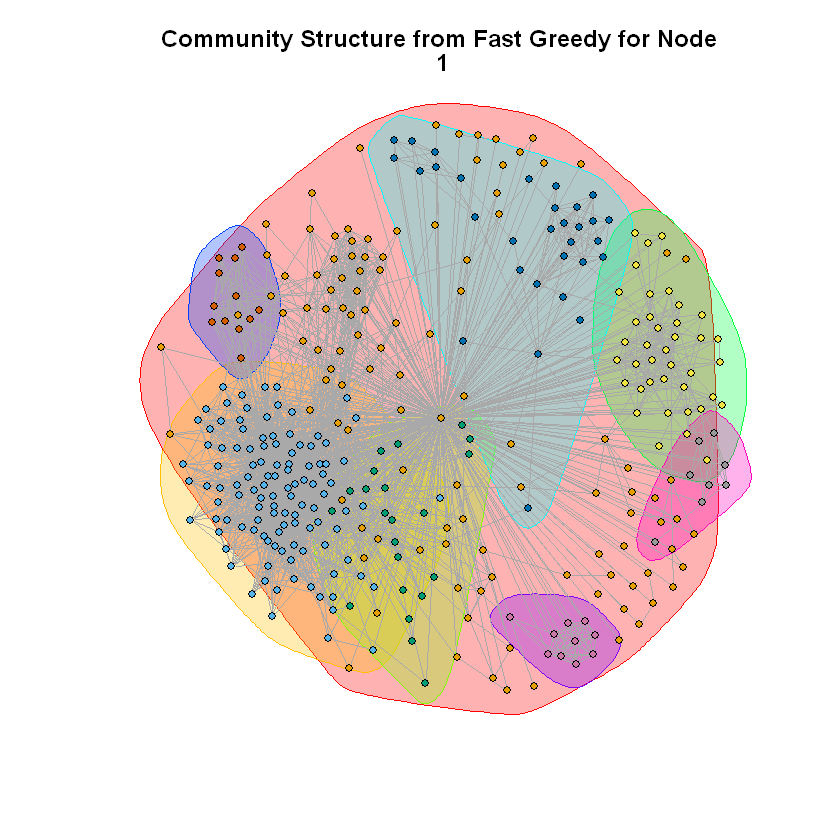

[1] "Infomap modularity is  0.389118471050977"


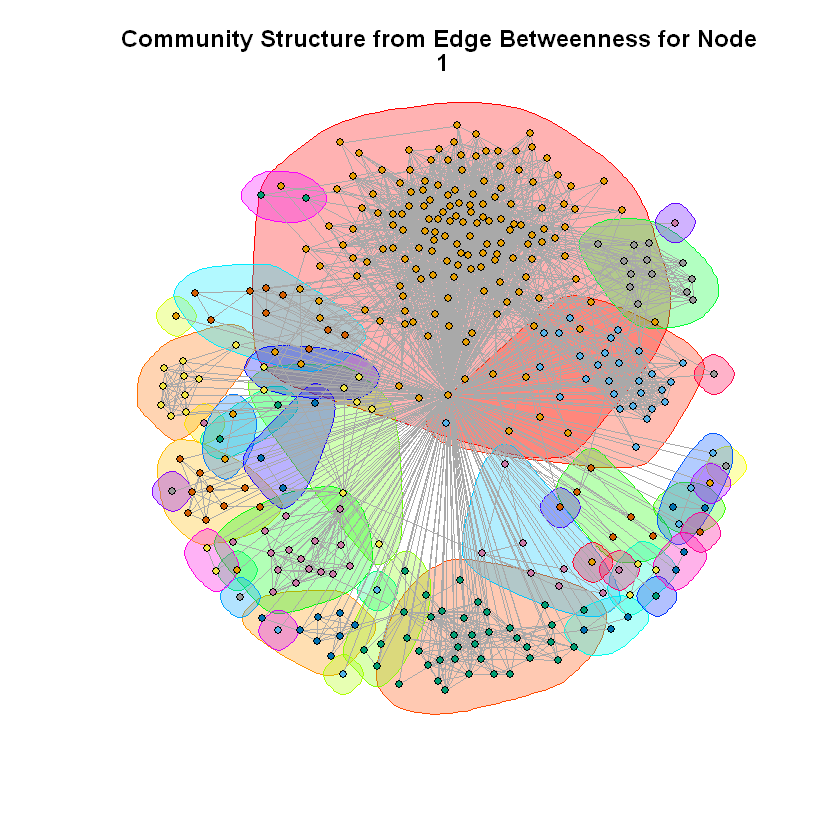

[1] "Fast Greedy modularity is  0.435958134882439"


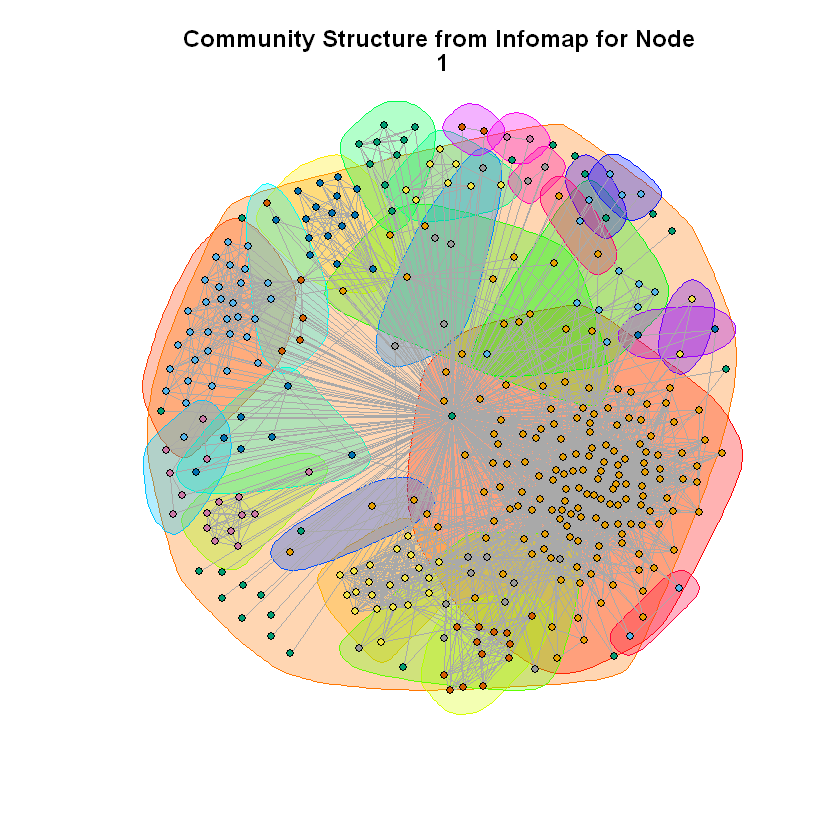

[1] "Edge Betweenness modularity is  0.506754916538902"


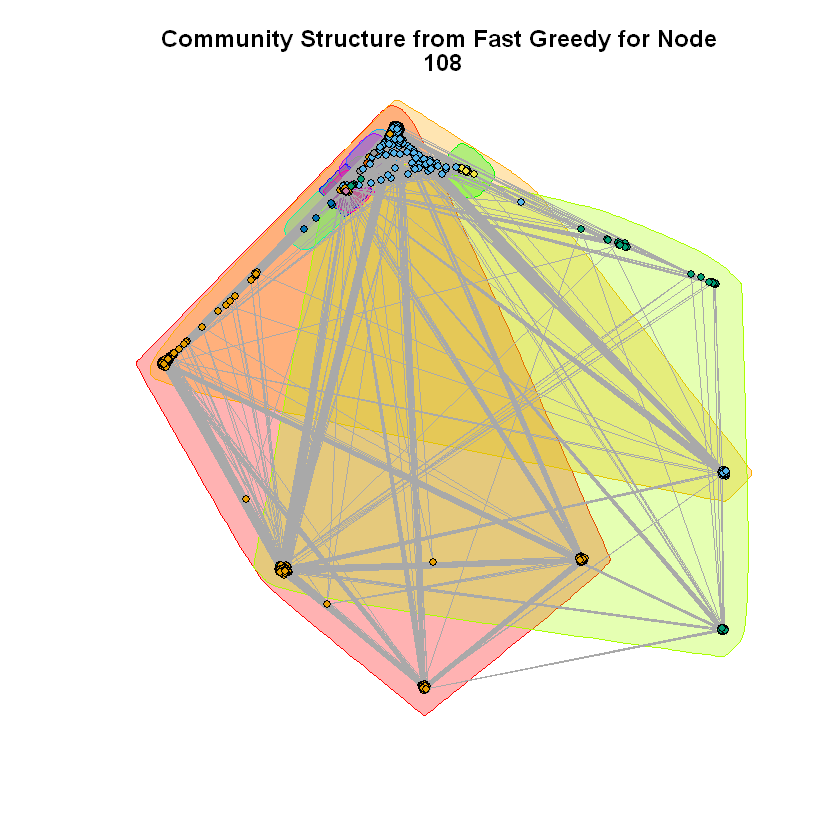

[1] "Infomap modularity is  0.508479123731198"


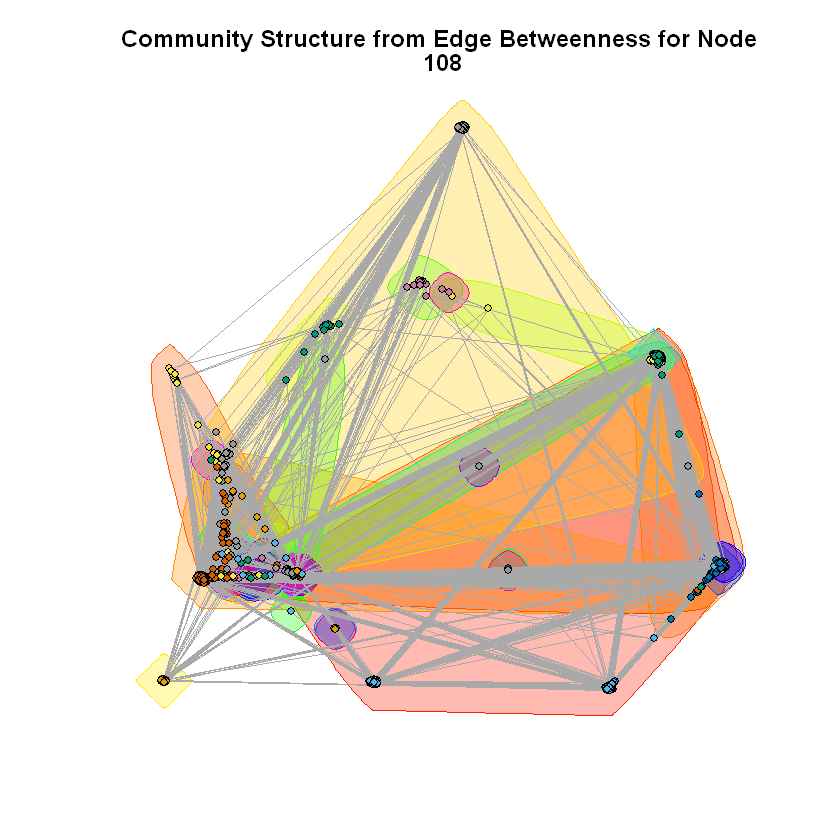

[1] "Fast Greedy modularity is  0.250346079690513"


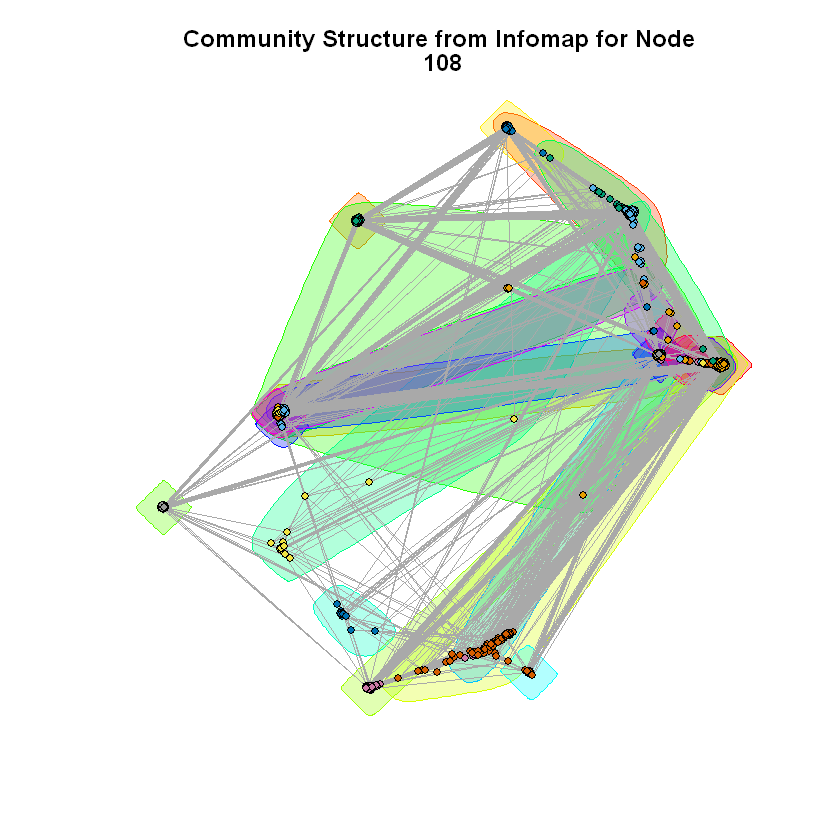

[1] "Edge Betweenness modularity is  0.133528021370078"


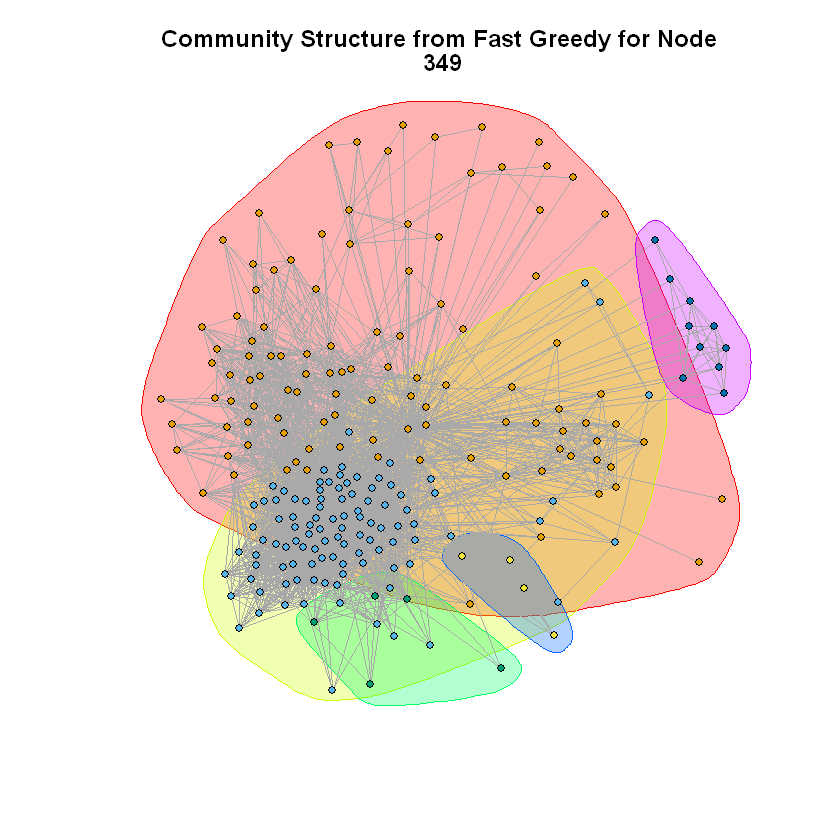

[1] "Infomap modularity is  0.211496306611192"


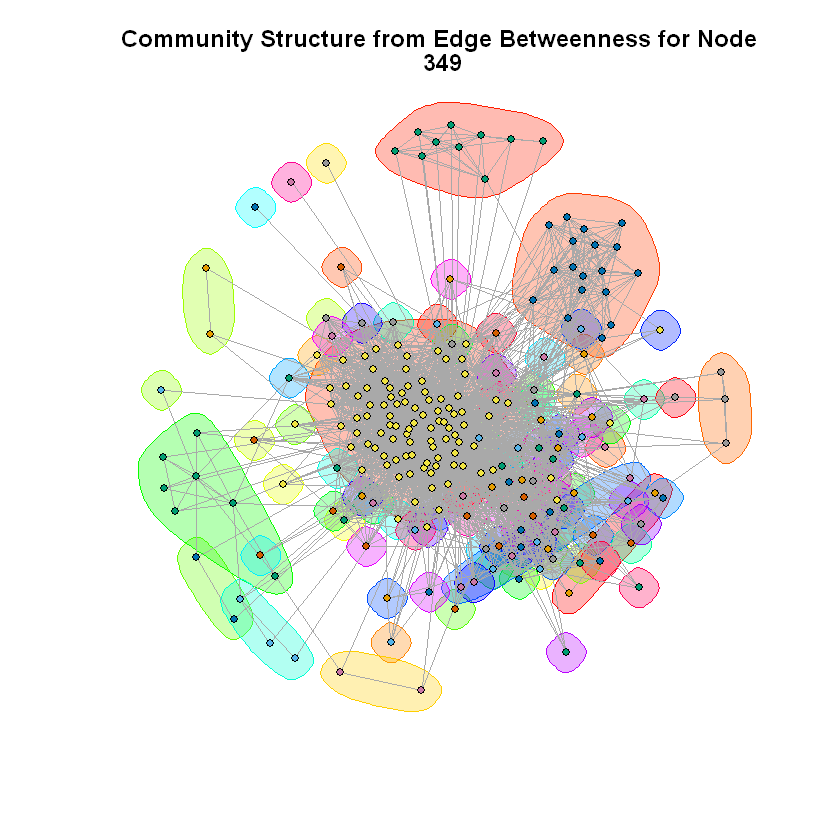

[1] "Fast Greedy modularity is  0.507001642196514"


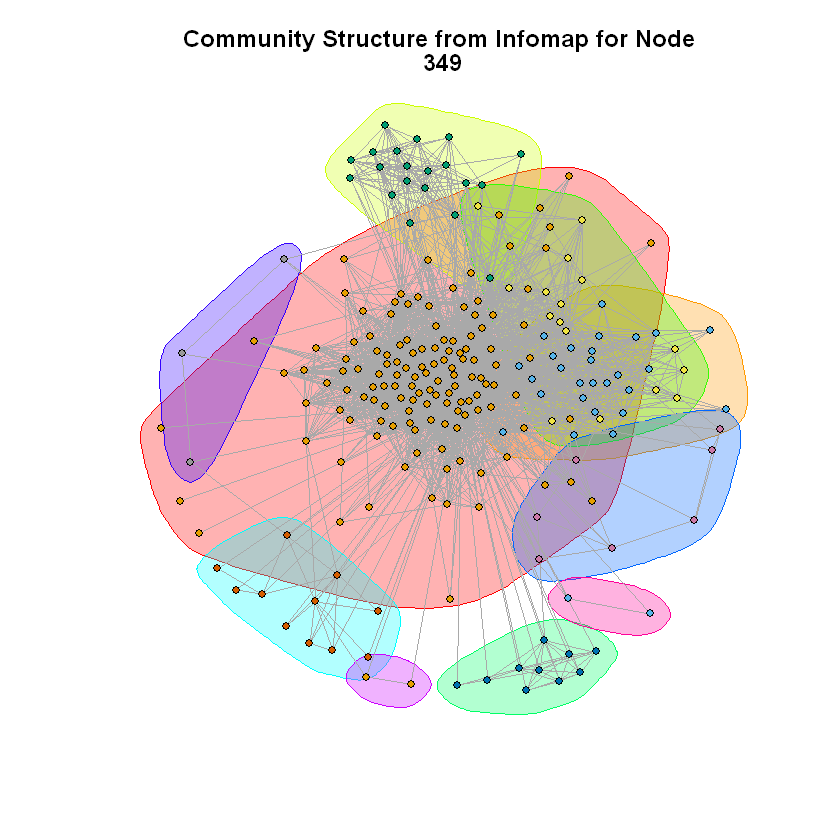

[1] "Edge Betweenness modularity is  0.489095180244803"


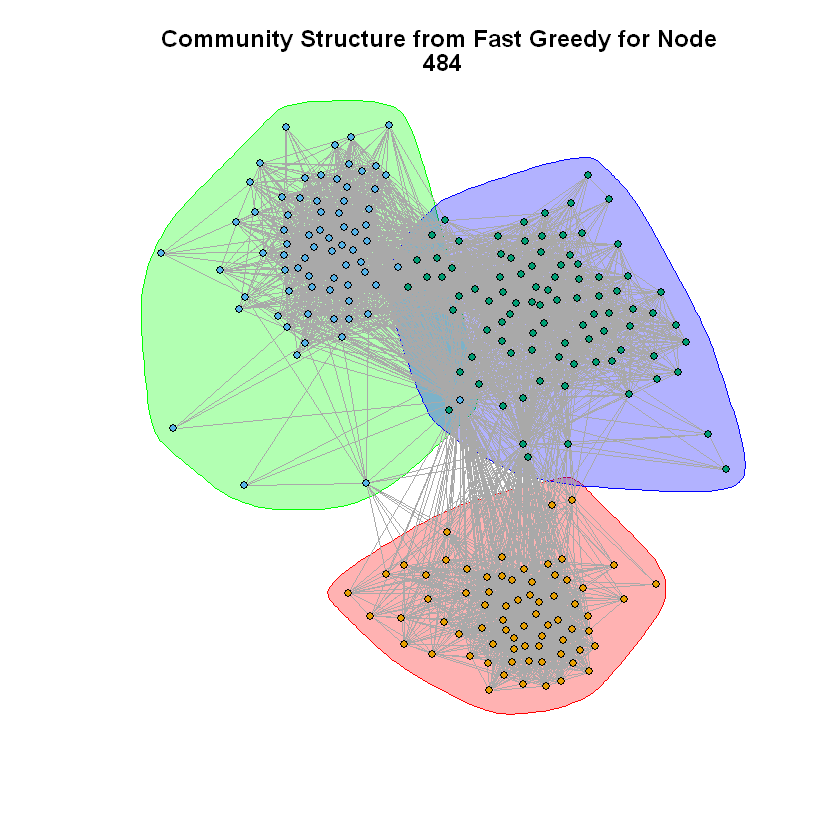

[1] "Infomap modularity is  0.515278752174842"


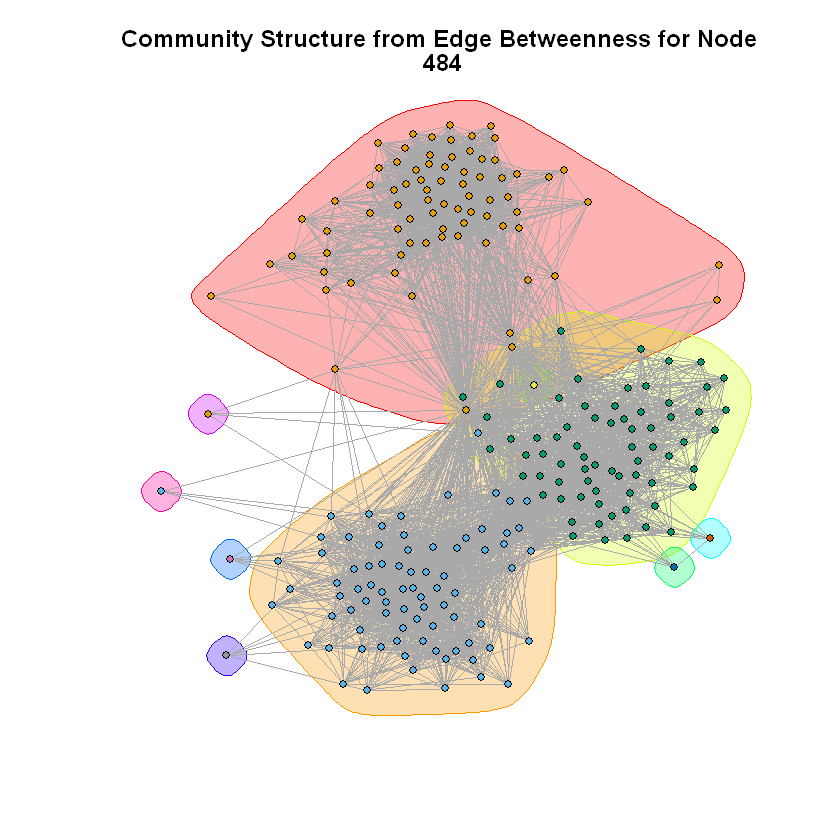

[1] "Fast Greedy modularity is  0.145531499565493"


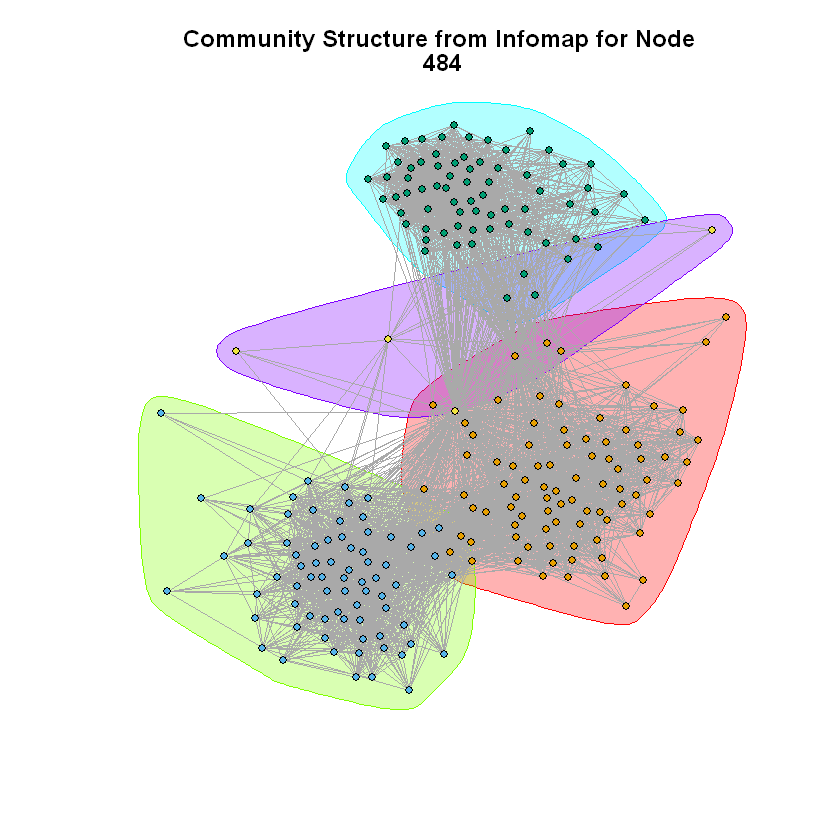

[1] "Edge Betweenness modularity is  0.027623772388464"


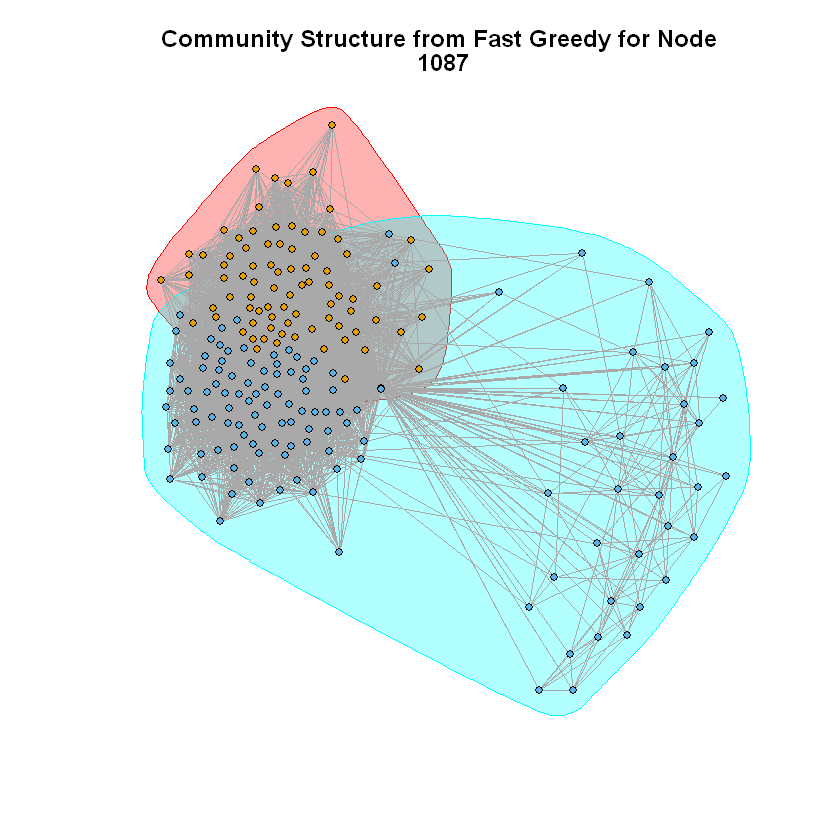

[1] "Infomap modularity is  0.0269066172233357"


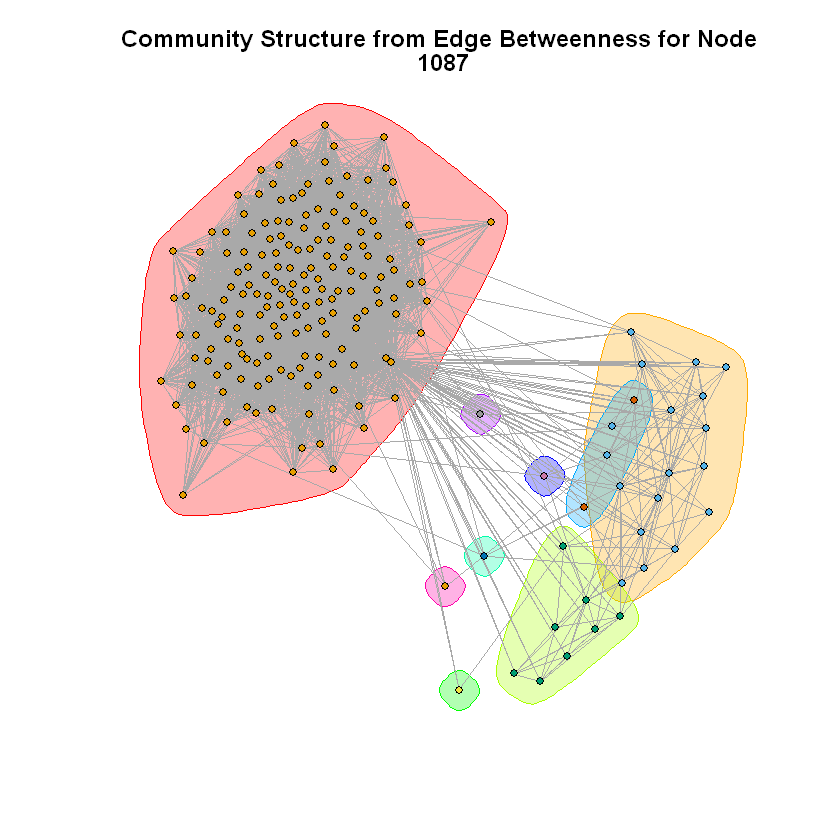

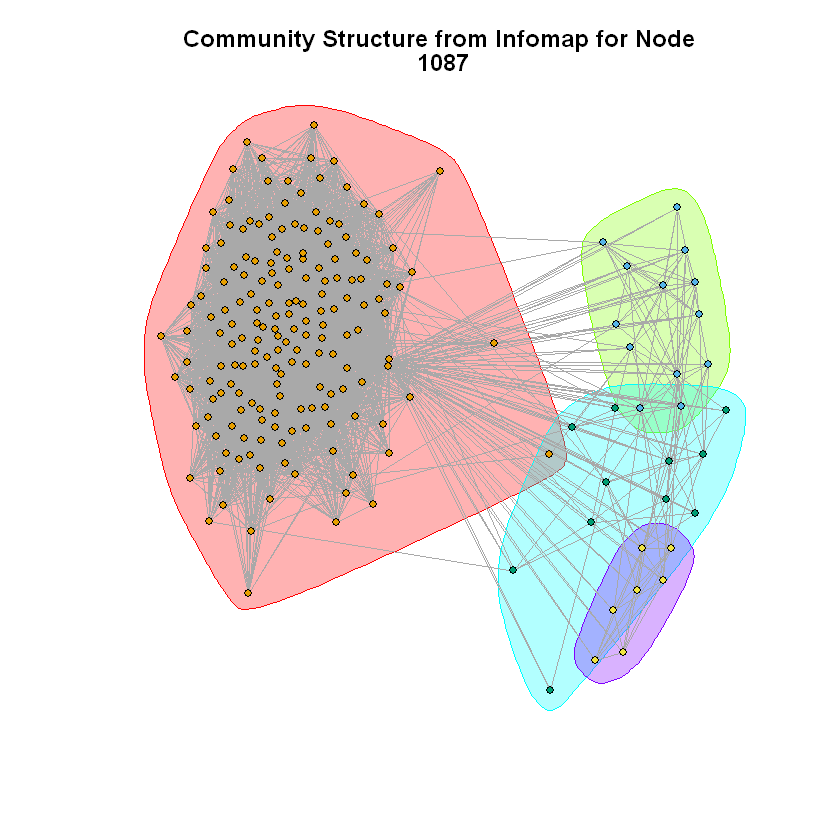

In [5]:
nodes_id=c(0,107,348,483,1086)
nodei_nets=make_ego_graph(fb_net,order=1,nodes=c('0','107','348','483','1086'))
for (i in seq(1:length(nodes_id))){

    nodei_net=nodei_nets[[i]]
    #fast greedy
    community1=cluster_fast_greedy(nodei_net)
    print(paste('Fast Greedy modularity is ',modularity(community1)))
    plot(community1,nodei_net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure from Fast Greedy for Node ',nodes_id[i]+1))
    #edge betweenness
    community2=cluster_edge_betweenness(nodei_net)
    print(paste('Edge Betweenness modularity is ',modularity(community2)))
    plot(community2,nodei_net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure from Edge Betweenness for Node ',nodes_id[i]+1))
    #infomap
    community3=cluster_infomap(nodei_net)
    print(paste('Infomap modularity is ',modularity(community3)))
    plot(community3,nodei_net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure from Infomap for Node ',nodes_id[i]+1))
    #cat('Modularity of Fast Greedy for node ',nodes_id[i],' is ',modularity(community1),'\n')
    #cat('Modularity of Edge Betweenness for node ',nodes_id[i],' is ',modularity(community2),'\n')
    #cat('Modularity of Infomap for node ',nodes_id[i],' is ',modularity(community3),'\n')
}

3.2 Community structure with the core node removed

# Question 10 For each of the core node's personalized network (use same core nodes as Question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as Question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.

[1] "Fast Greedy modularity is  0.44185326886839"
[1] "Edge Betweenness modularity is  0.41614614203983"


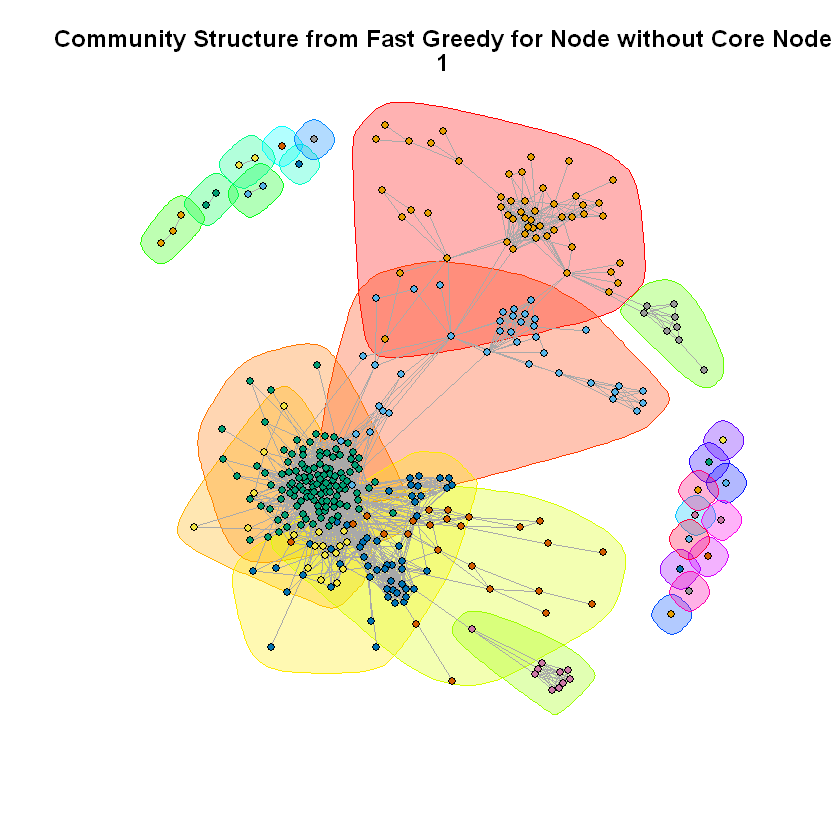

[1] "Infomap modularity is  0.418007659453891"


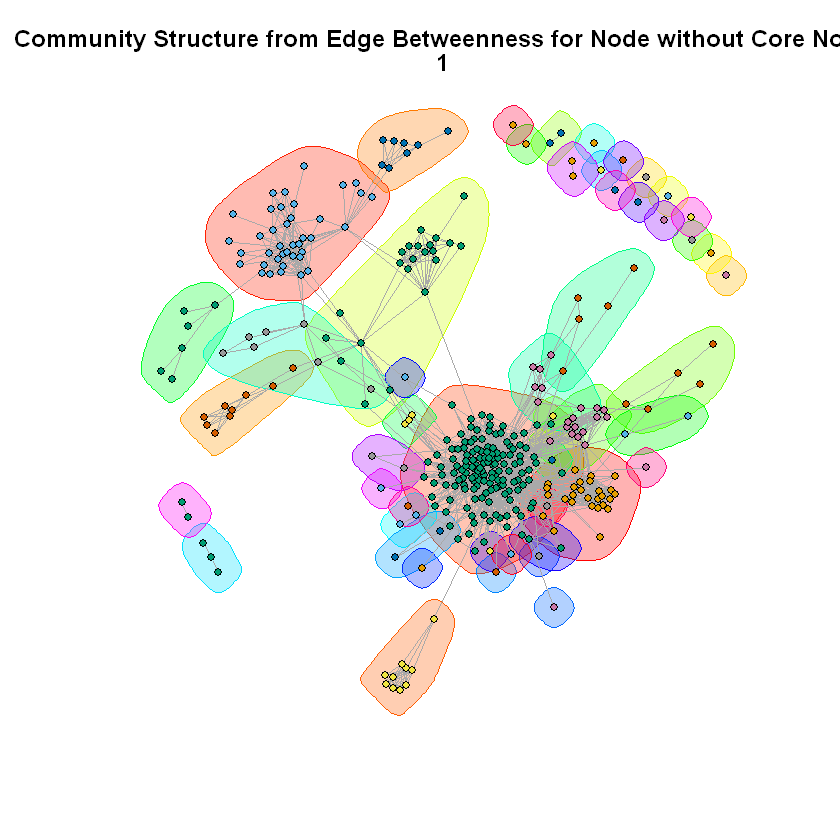

[1] "Fast Greedy modularity is  0.458146592366146"


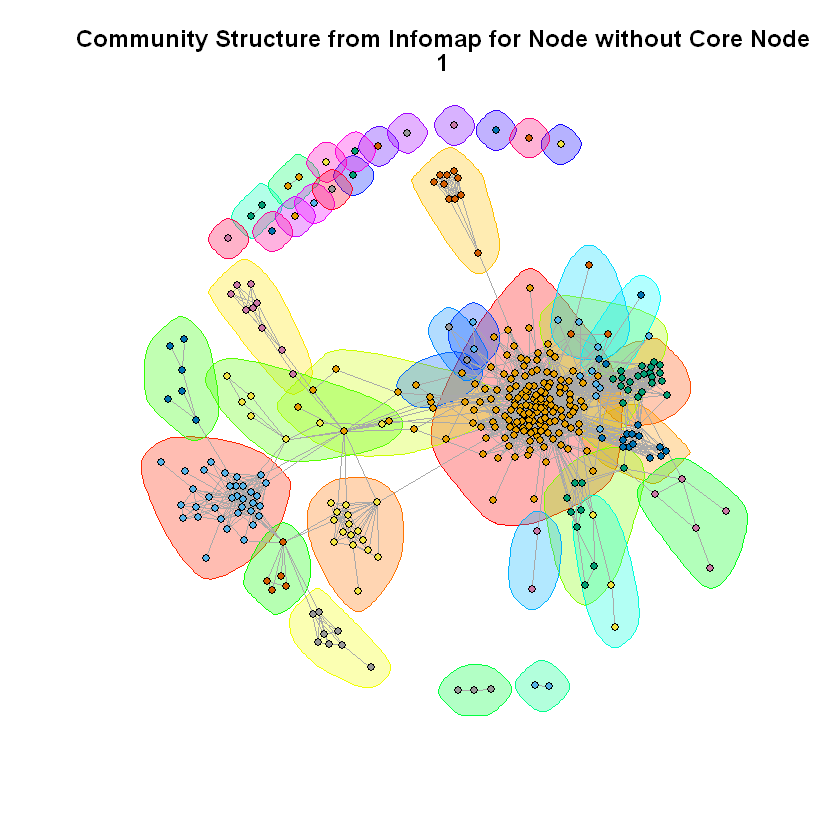

[1] "Edge Betweenness modularity is  0.521321576382217"


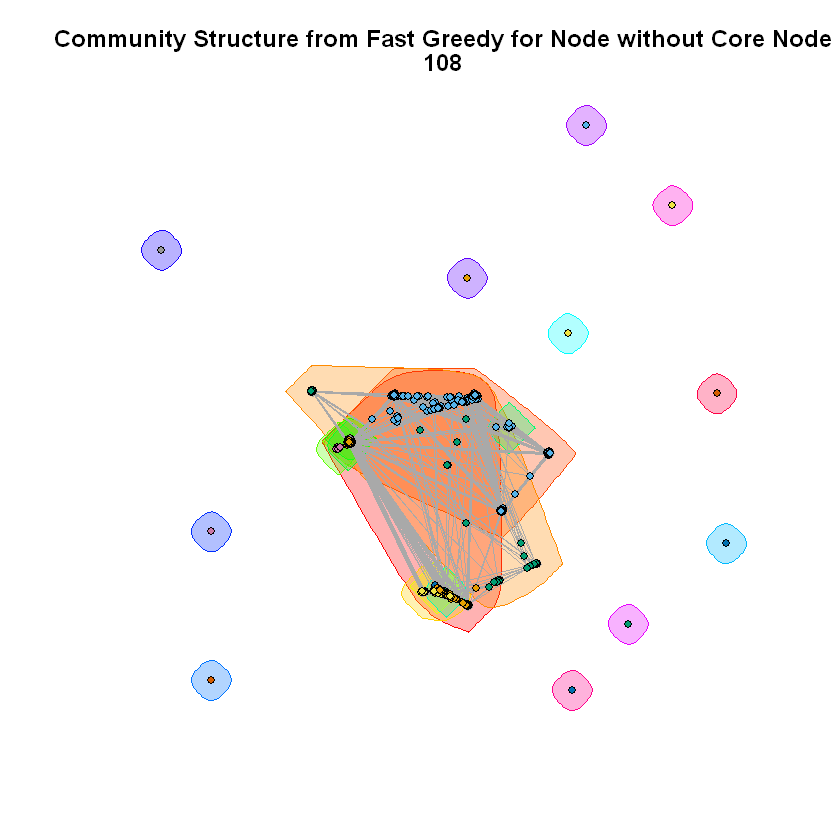

[1] "Infomap modularity is  0.518152679884706"


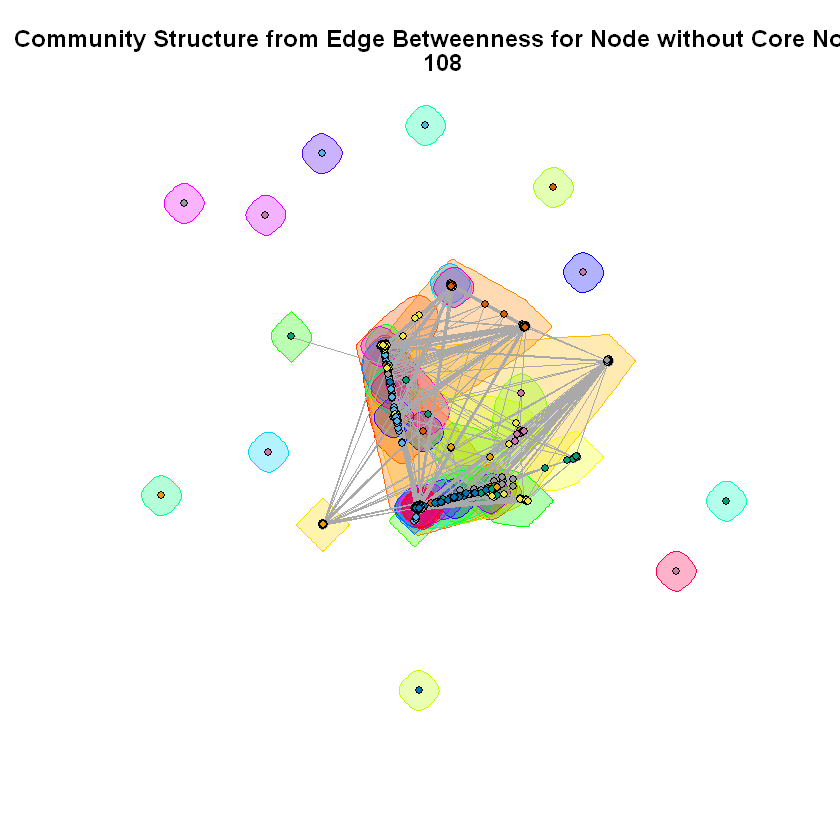

[1] "Fast Greedy modularity is  0.245691795942674"


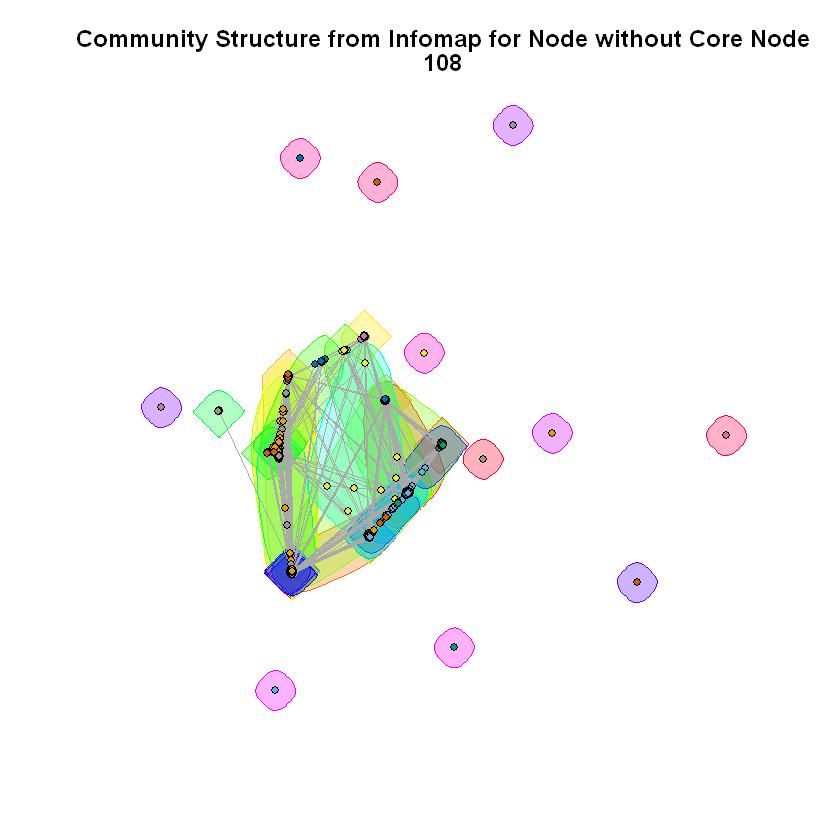

[1] "Edge Betweenness modularity is  0.150566340187559"


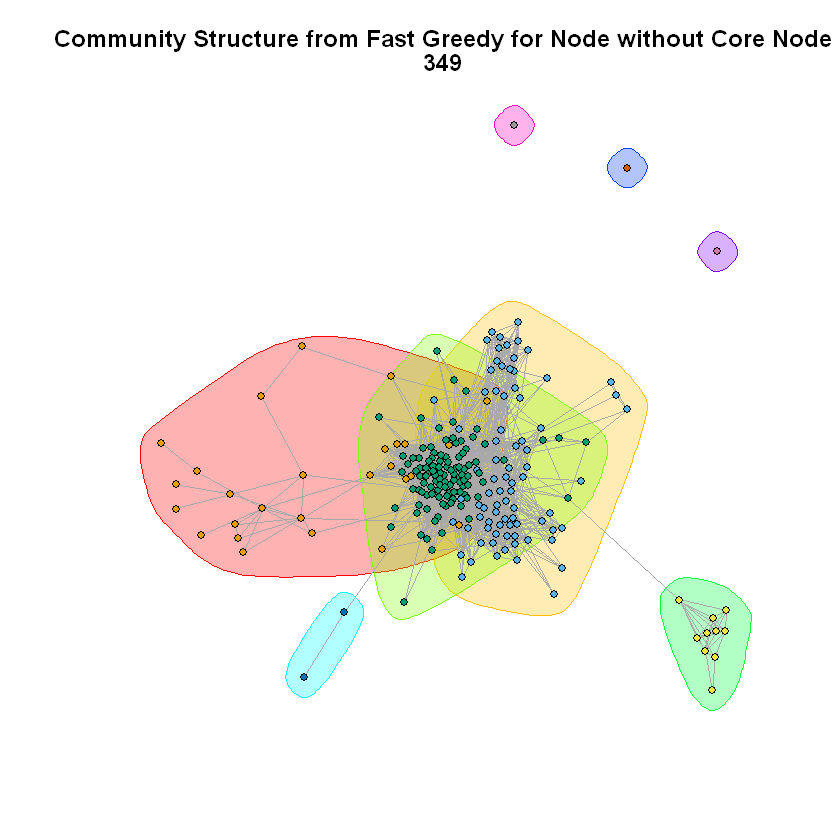

[1] "Infomap modularity is  0.233773198730166"


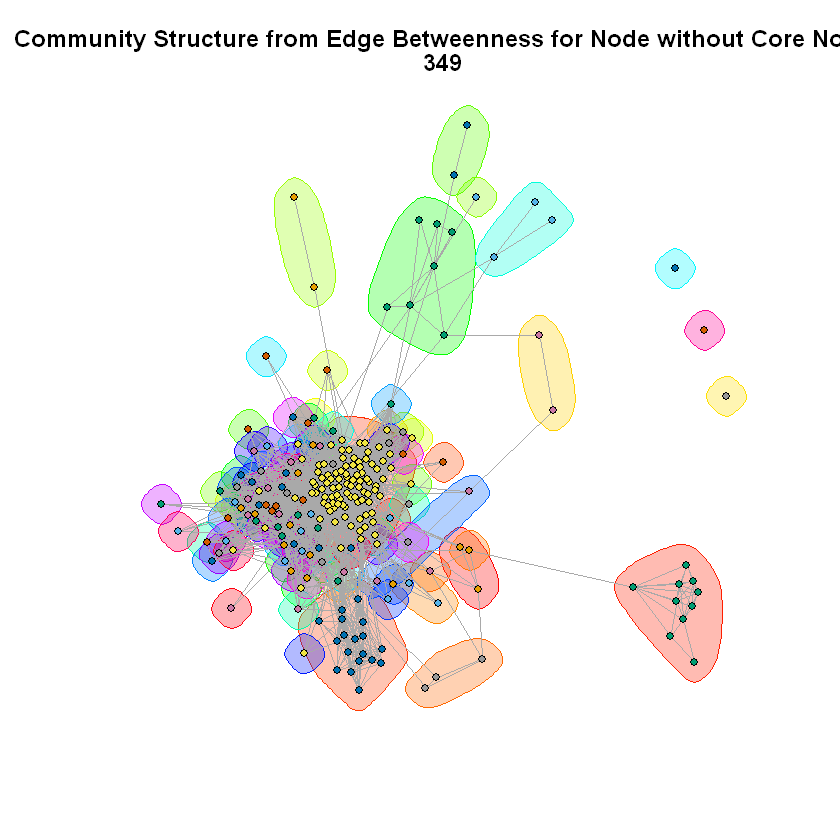

[1] "Fast Greedy modularity is  0.534214154606172"


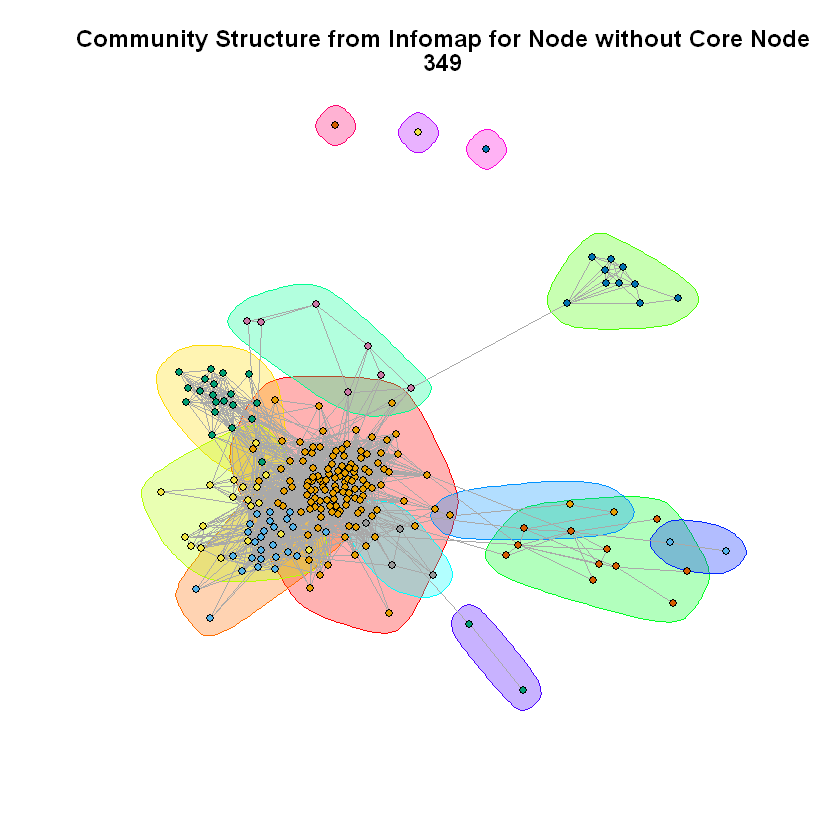

[1] "Edge Betweenness modularity is  0.515441277123504"


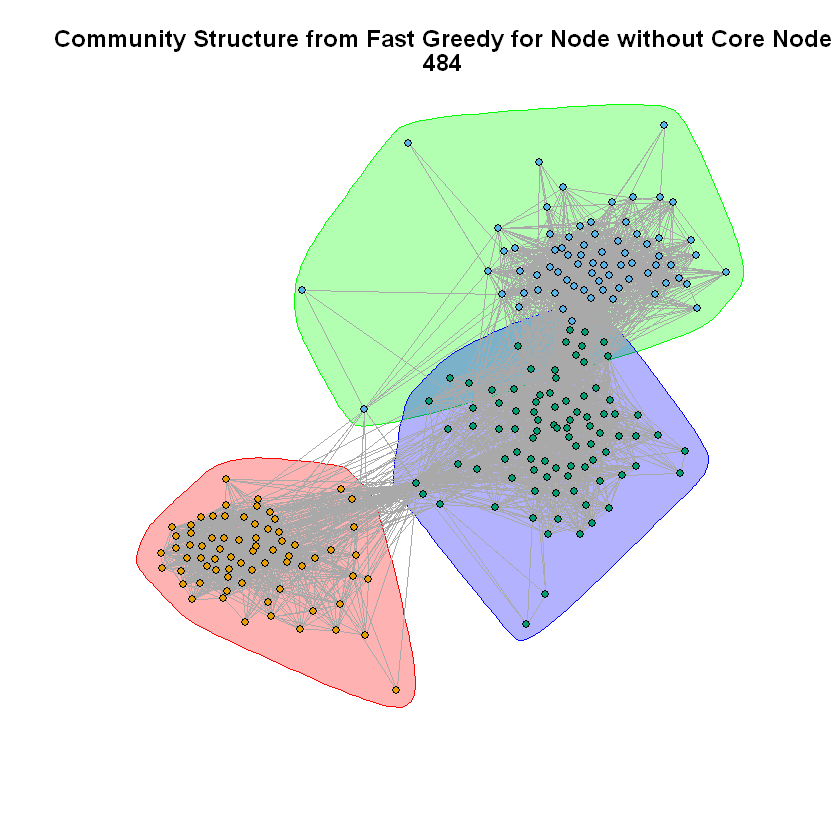

[1] "Infomap modularity is  0.543443679279522"


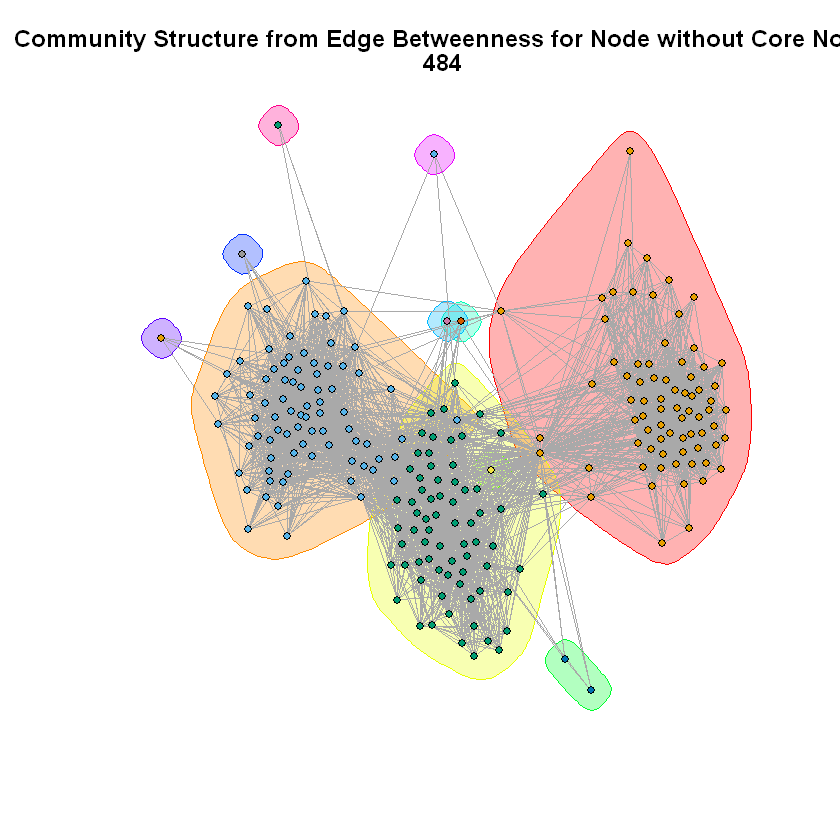

[1] "Fast Greedy modularity is  0.148195631953499"


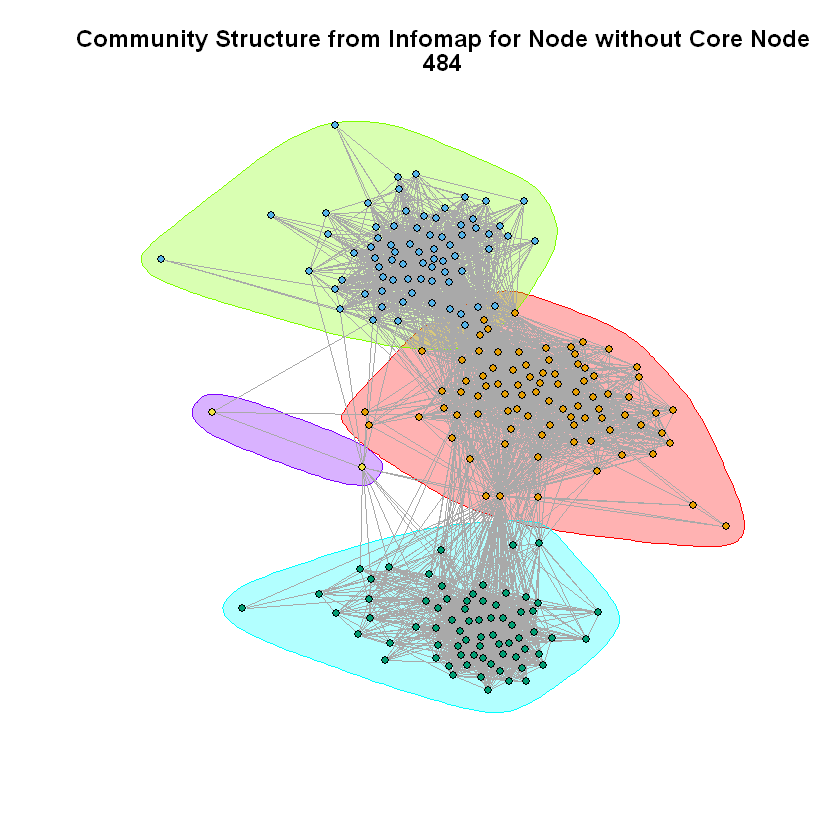

[1] "Edge Betweenness modularity is  0.0324952980499142"


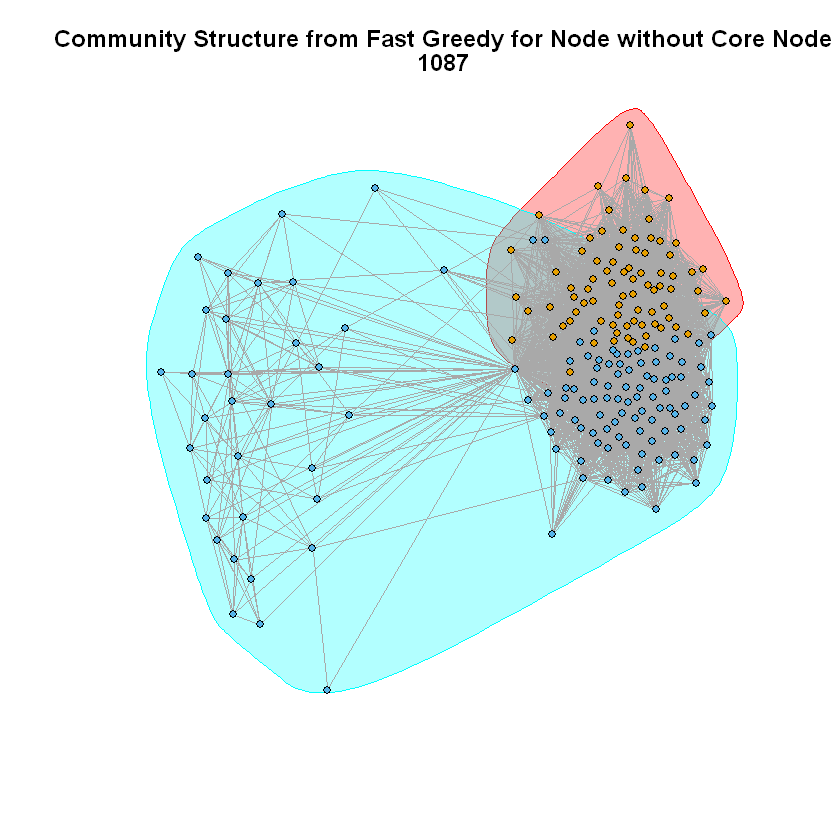

[1] "Infomap modularity is  0.0273715944871148"


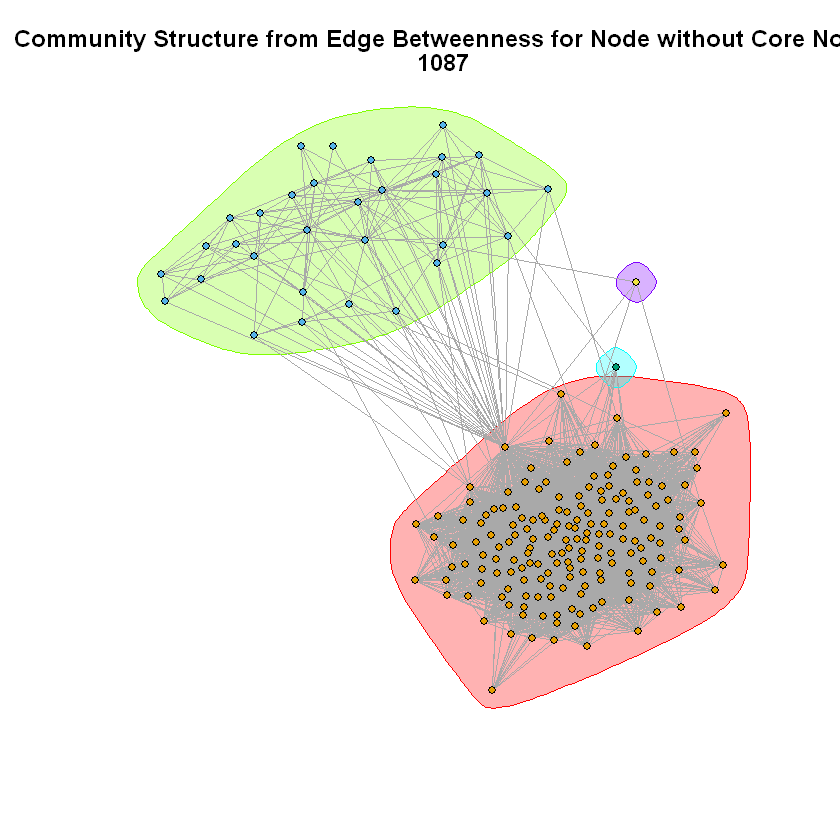

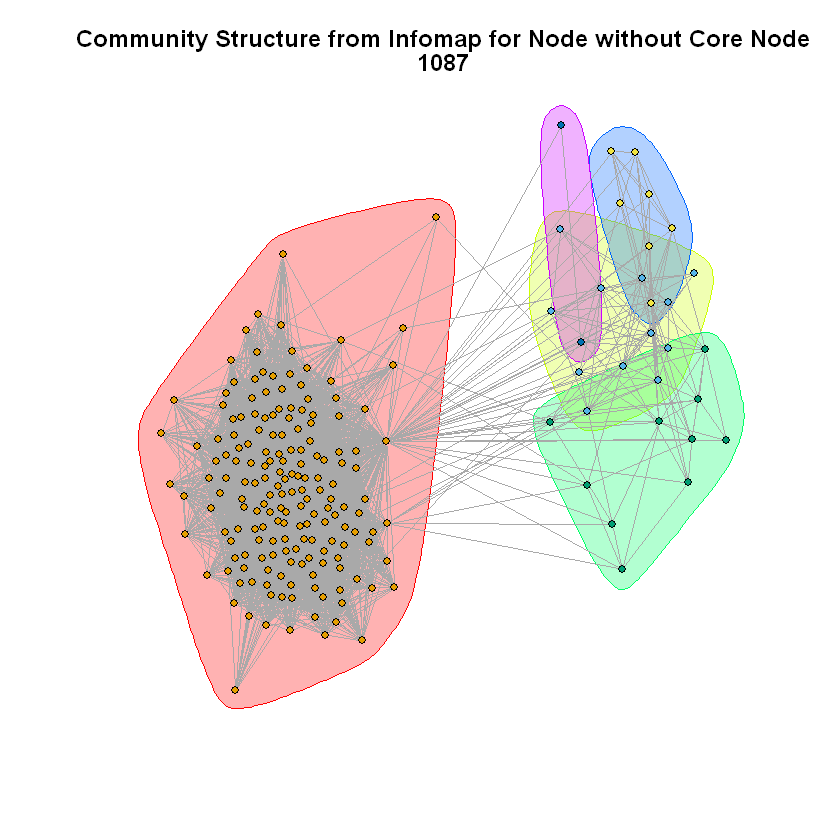

In [6]:
nodes_id=c(0,107,348,483,1086)
nodei_nets=make_ego_graph(fb_net,order=1,nodes=c('0','107','348','483','1086'))
for (i in seq(1:length(nodes_id))){

    nodei_net=nodei_nets[[i]]
    #remove corresponding core node
    nodei_net=delete_vertices(nodei_net,toString(nodes_id[i]))
    #fast greedy
    community1=cluster_fast_greedy(nodei_net)
    print(paste('Fast Greedy modularity is ',modularity(community1)))
    plot(community1,nodei_net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure from Fast Greedy for Node without Core Node',nodes_id[i]+1))
    #edge betweenness
    community2=cluster_edge_betweenness(nodei_net)
    print(paste('Edge Betweenness modularity is ',modularity(community2)))
    plot(community2,nodei_net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure from Edge Betweenness for Node without Core Node',nodes_id[i]+1))
    #infomap
    community3=cluster_infomap(nodei_net)
    print(paste('Infomap modularity is ',modularity(community3)))
    plot(community3,nodei_net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure from Infomap for Node without Core Node',nodes_id[i]+1))

}

3.3 Characteristic of nodes in the personalized network

# QUESTION 11: Write an expression relating the Embeddedness between the core node and a non-core node to the degree of the non-core node in the personalized network of the core node.

# QUESTION 12: For each of the core node's personalized network (use the same core nodes as Question 9), plot the distribution histogram of embeddedness and dispersion. In this question, you will have 10 plots.

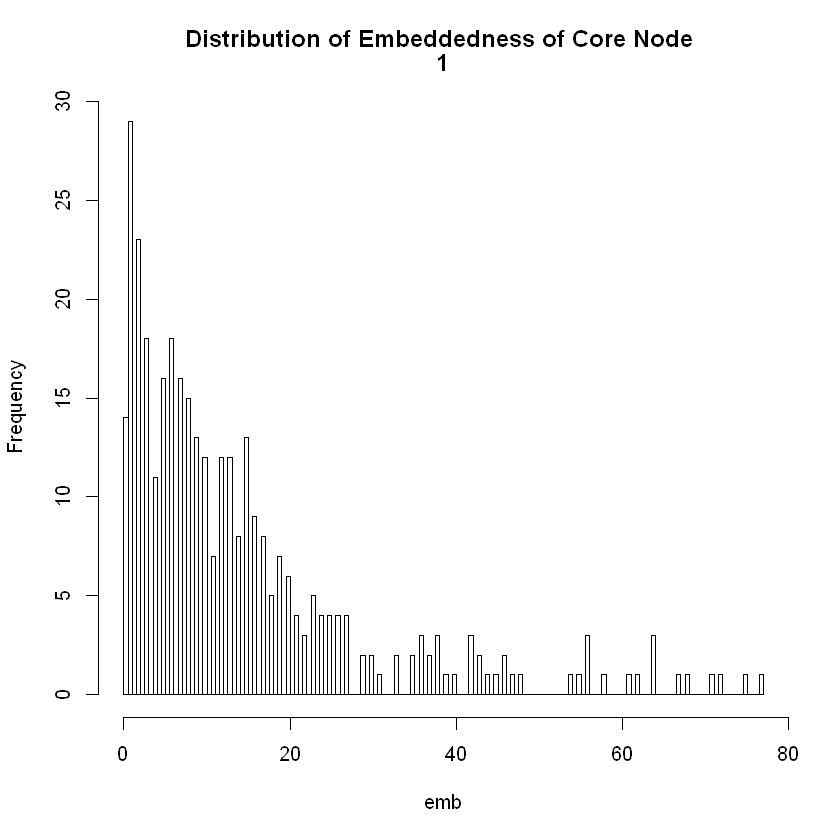

347347

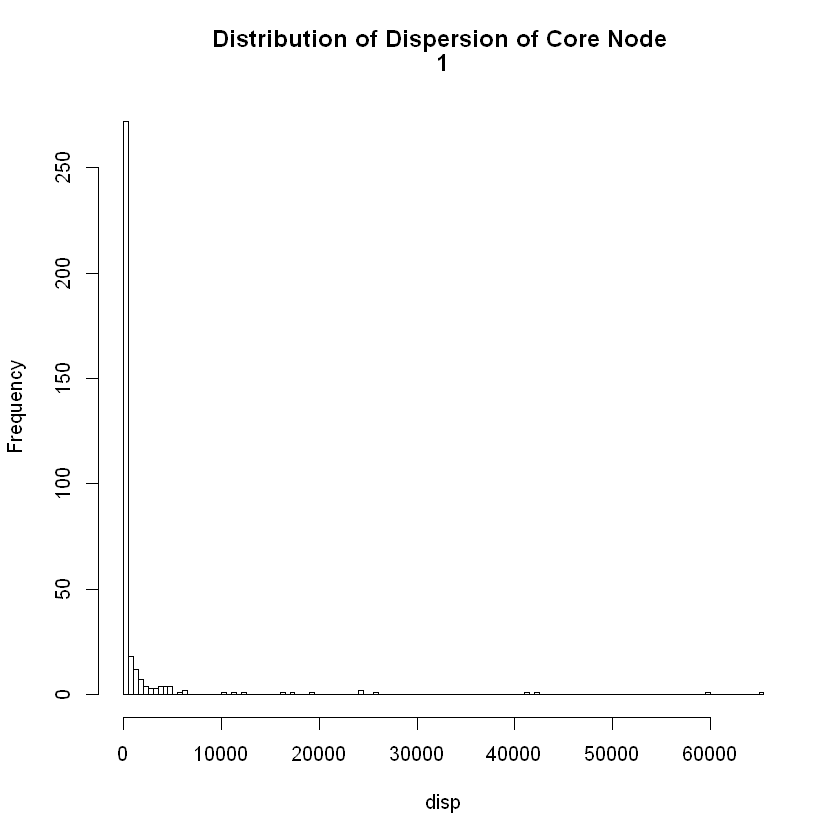

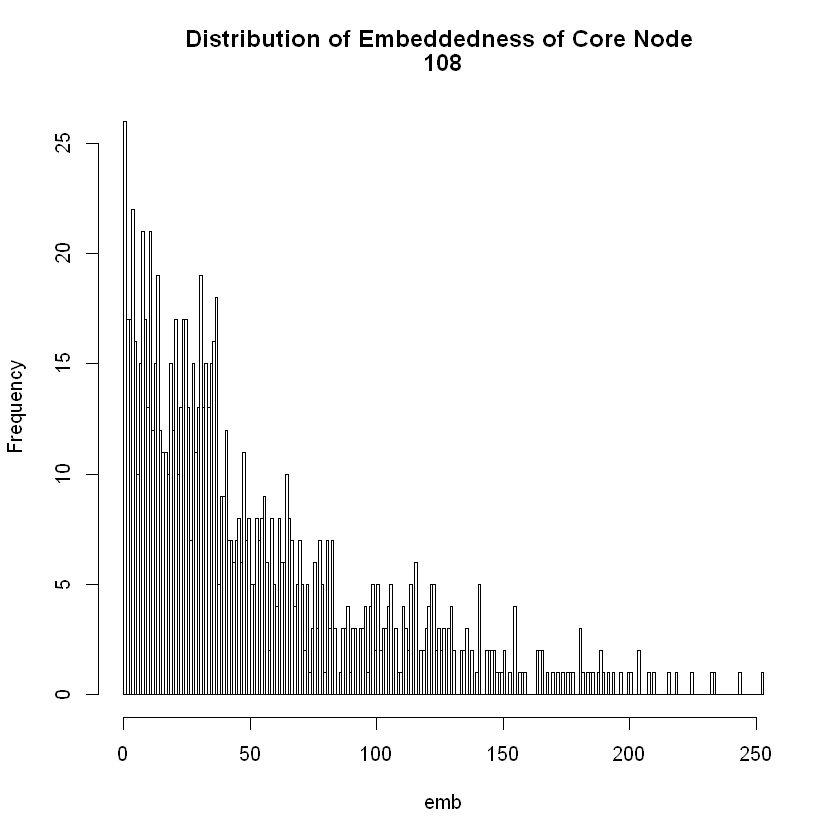

10451045

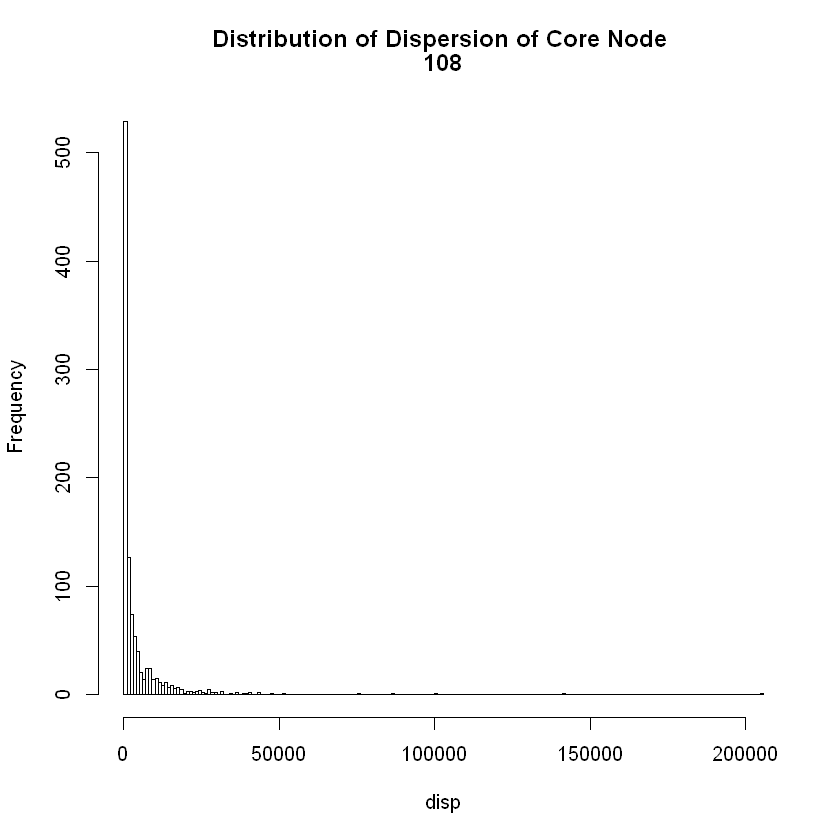

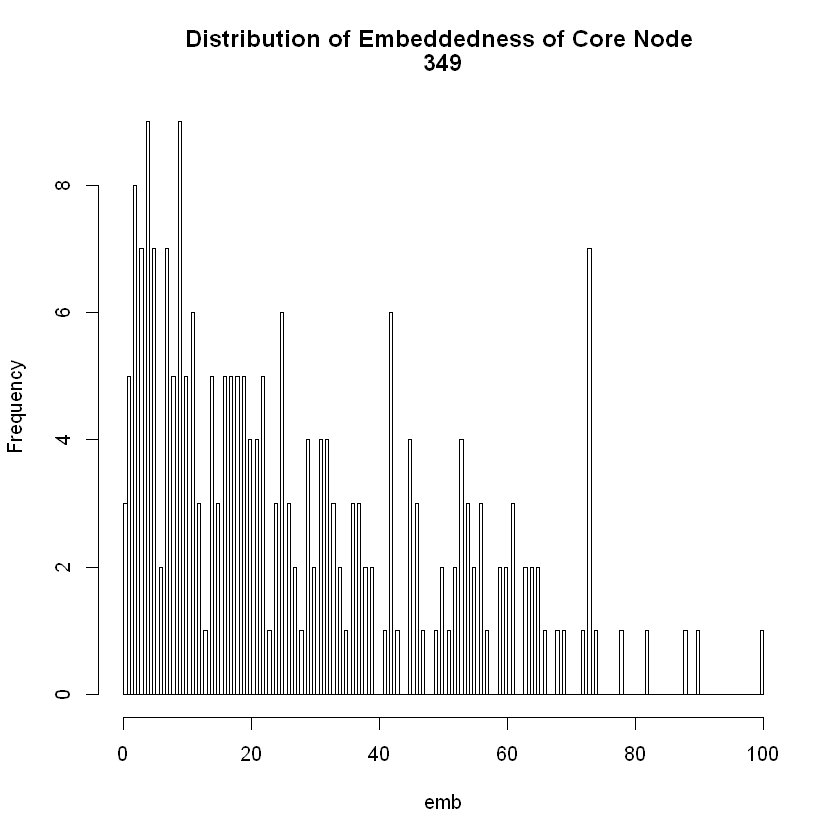

229229

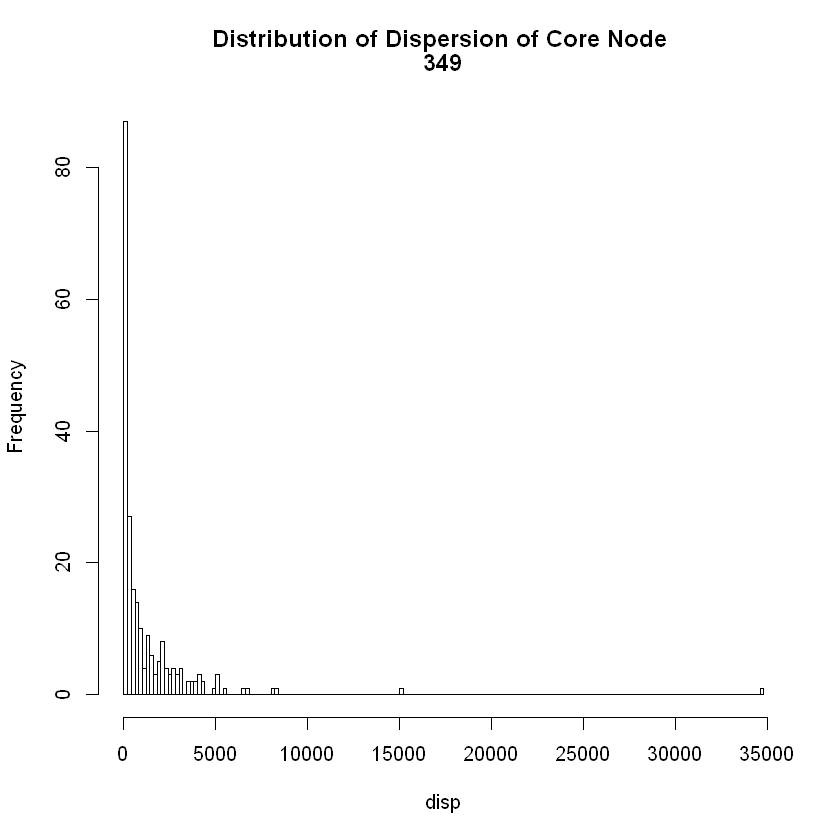

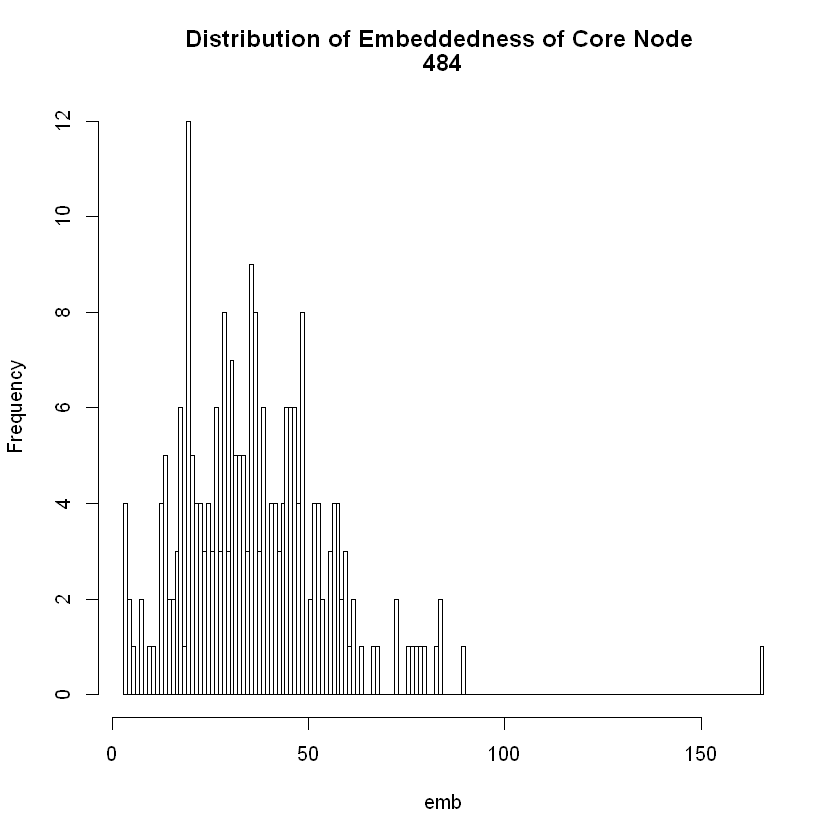

231231

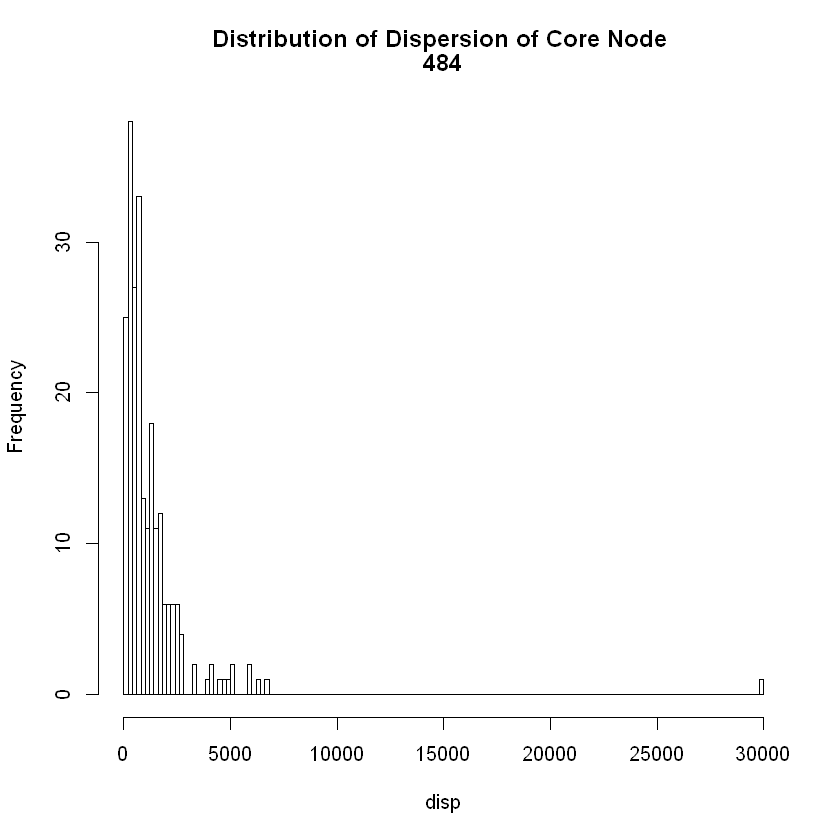

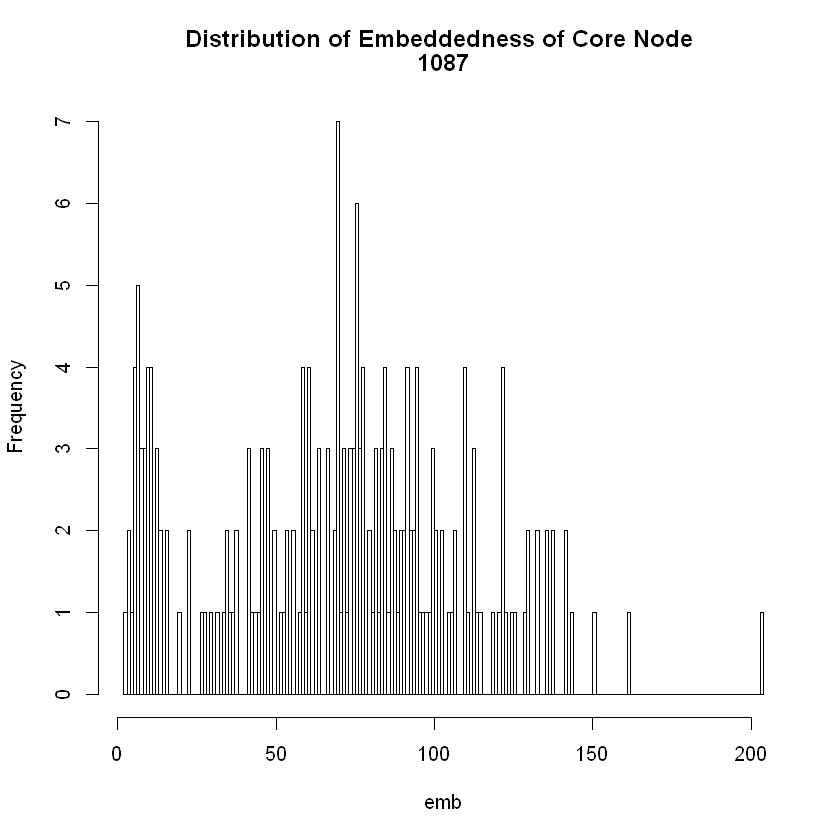

205205

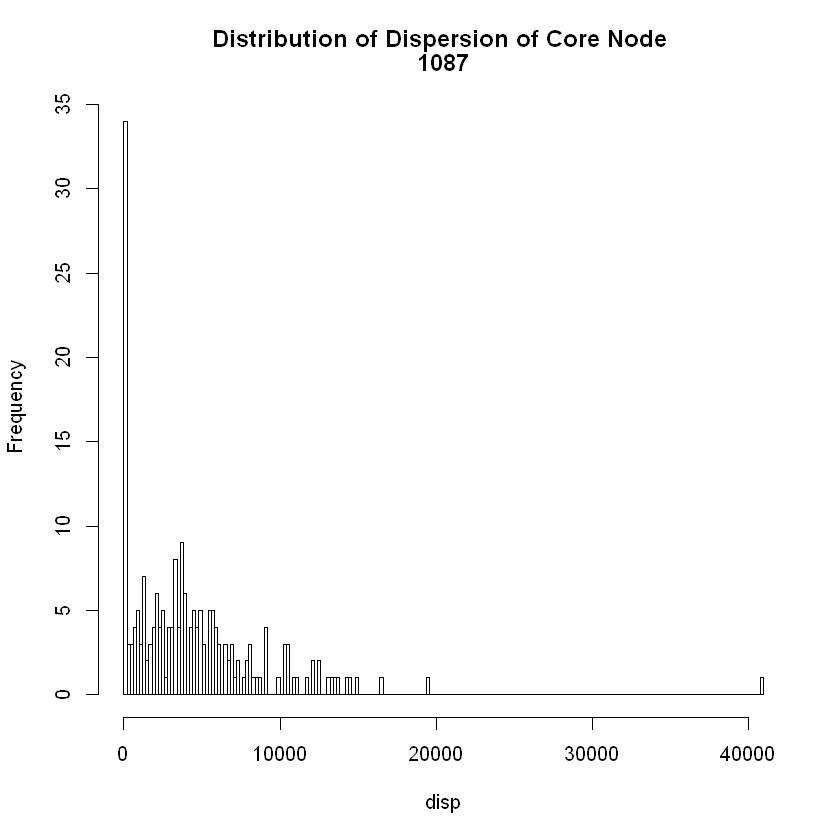

In [8]:
nodes_id=c(0,107,348,483,1086)
nodei_nets=make_ego_graph(fb_net,order=1,nodes=c('0','107','348','483','1086'))
for (i in seq(1:length(nodes_id))){
    #extract corresponding network
    nodei_net=nodei_nets[[i]]
    #extract all neighbor
    nodei_nb=c(V(nodei_net)$name)
    #define empty object
    emb=c()
    disp=c()
    
    for (n in nodei_nb){
        if (n!=nodes_id[i]){
        #extract mutual neighbors of two endpoints
        mutual_neb=intersection(neighbors(nodei_net,toString(nodes_id[i])),neighbors(nodei_net,toString(n)))
        #the number of neighbors is the embeddedness
        emb_sub=length(mutual_neb)
        if (emb_sub==0){
            emb=c(emb,emb_sub)
            disp=c(disp,0)
            next
        }
        #mutual_neb=mutual_neb$name
        mutual_neb_=c()
        for (k in 1:length(mutual_neb)){
            mutual_neb_=c(mutual_neb_,mutual_neb[k]$name)
        }
        net_nouv=delete_vertices(nodei_net,c(nodes_id[i],n))
        dist=distances(net_nouv,v=mutual_neb_, to=mutual_neb_)
        sum=0
        for (j in 1:length(dist)){
            if (dist[j] > 1000 ){
                sum=sum+1000
            }else{
                sum=sum+dist[j]
            }
        }
        #since each distance is considered twice, divided by 2 
        disp_sub=sum/2
        disp=c(disp,disp_sub)
        emb=c(emb,emb_sub)
    }
    }
hist(emb,breaks=200,main=c('Distribution of Embeddedness of Core Node ',nodes_id[i]+1))
hist(disp,breaks=200,main=c('Distribution of Dispersion of Core Node ',nodes_id[i]+1))
#plot(emb,main=c('Distribution of Embeddedness of Core Node ',nodes_id[i]+1))
#plot(disp,main=c('Distribution of Dispersion of Core Node ',nodes_id[i]+1))
cat(length(emb))
cat(length(disp))
}

In [9]:
cat(disp)

40969 306 42 84 200 117 6197 124 6960 2123 8277 3718 2223 3166 3300 5000 2449 3283 998 6498 1805 5954 1 2500 901 64 1436 611 8796 39 786 1208 6473 10531 4721 58 3876 96 4637 719 4206 889 4855 12418 3246 1277 7852 1227 23 5613 2038 6683 3333 3855 128 3608 4854 433 7801 8127 50 2232 14416 848 1907 9092 3309 4395 143 6453 3366 5455 3650 5787 4451 3680 52 1007 2964 2535 3869 24 4589 1014 53 3968 3696 5132 2780 2138 1316 13608 109 7661 4649 1256 8141 9019 12539 9058 10315 1517 3709 22 25 72 37 14379 69 5423 2249 6820 1247 48 3293 9936 1990 2470 5937 3441 8019 315 6030 1778 5471 302 5675 2401 71 2984 867 11622 7399 4411 6168 5753 2191 3441 10546 10461 3911 5034 3856 10865 9016 1809 3015 2315 2105 26 6725 14969 5496 5760 9 3194 11 27 1672 4580 12059 11054 24 5866 3752 552 19 12095 3499 7399 2144 3386 13547 4971 1313 508 5985 3479 10355 4594 7047 16594 13252 4333 3143 4887 5512 10399 21 656 13142 6815 2973 78 5071 1791 3625 4365 1063 8406 3761 19567 2824 4667 6

# QUESTION 13: For each of the core node's personalized network, plot the community structure of the personalized network using colors and highlight the node with maximum dispersion. Also, highlight the edges incident to this node. To detect the community structure, use Fast-Greedy algorithm. In this question, you will have 5 plots.

The node with maximum dispersion of node  0  is  19The node with maximum dispersion of node  107  is  1835

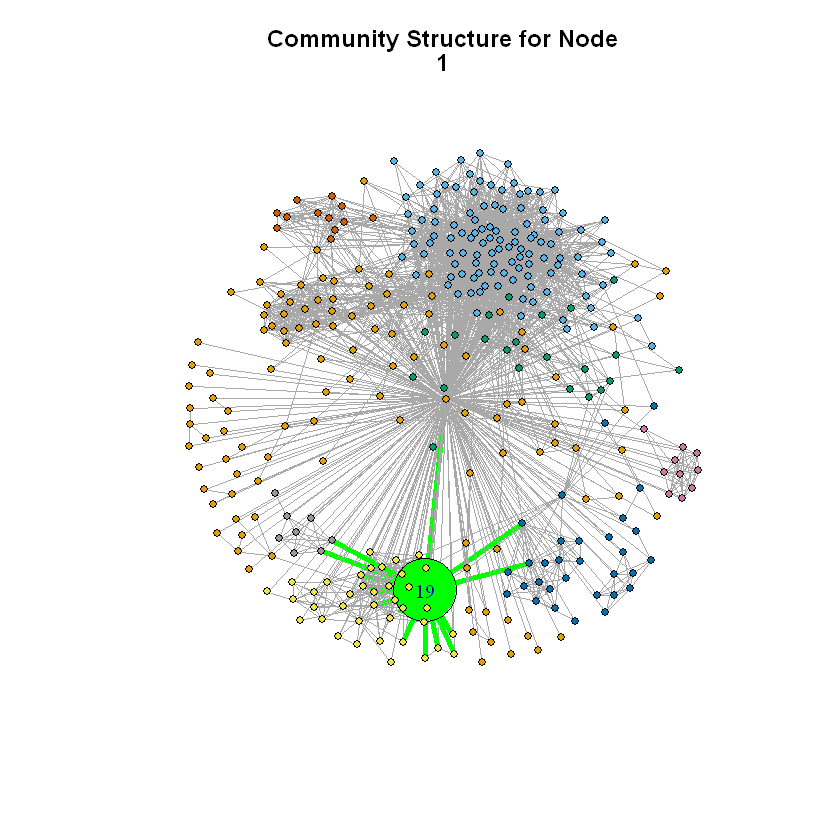

The node with maximum dispersion of node  348  is  387

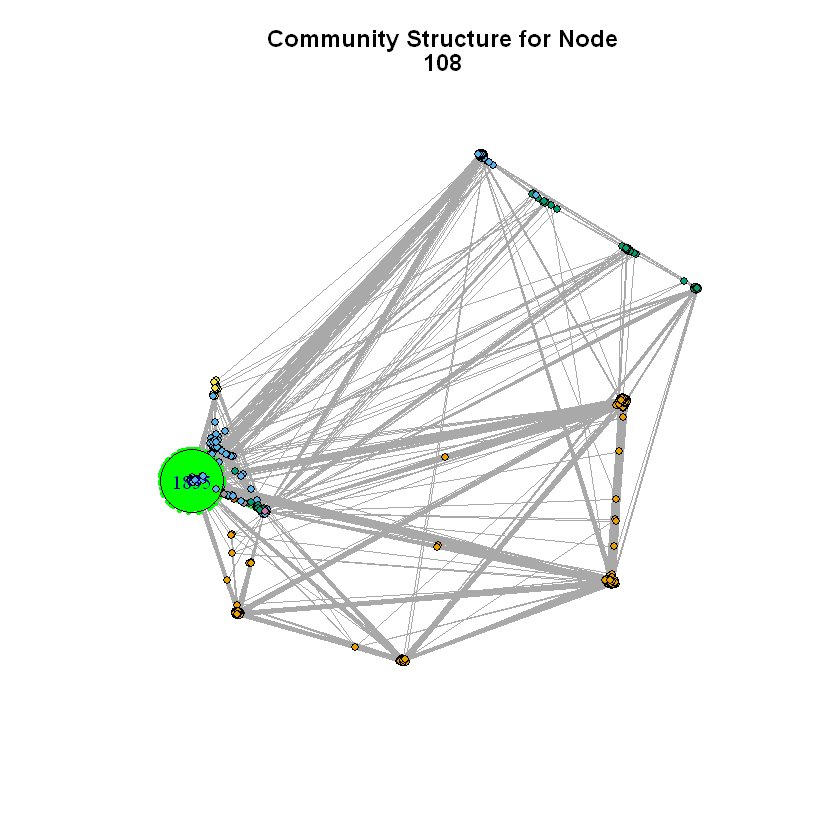

The node with maximum dispersion of node  483  is  107

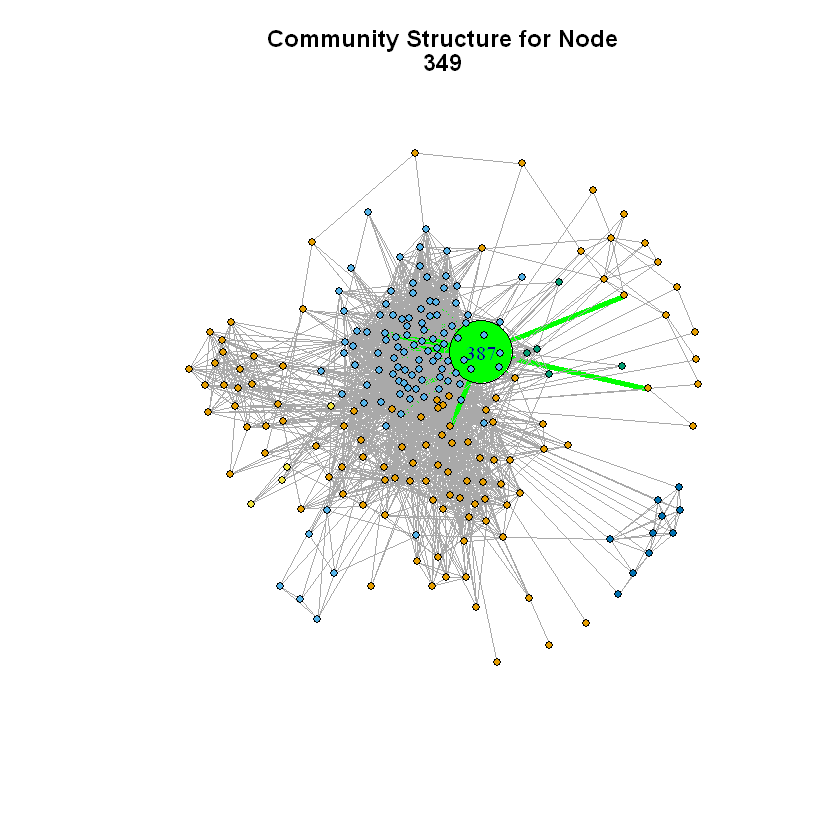

The node with maximum dispersion of node  1086  is  107

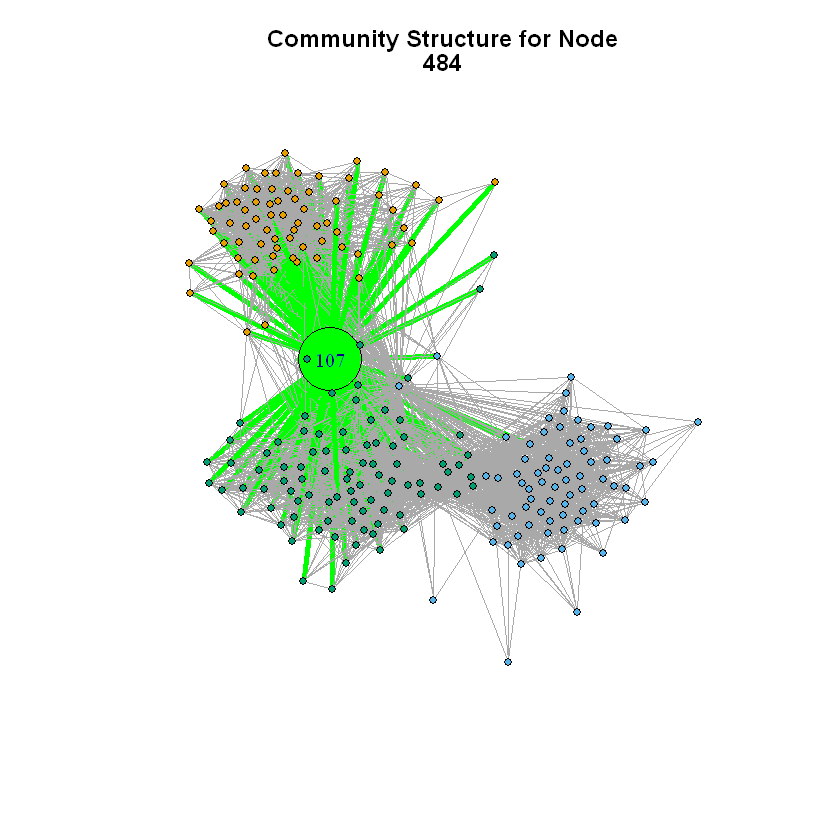

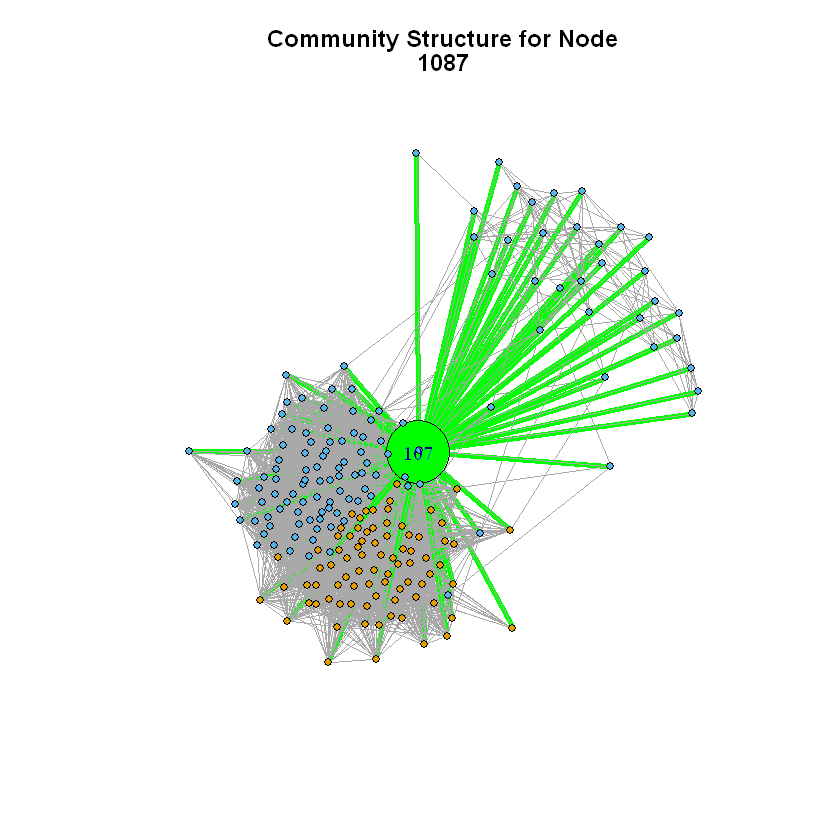

In [10]:
nodes_id=c(0,107,348,483,1086)
nodei_nets=make_ego_graph(fb_net,order=1,nodes=c('0','107','348','483','1086'))
for (i in seq(1:length(nodes_id))){
    #extract corresponding network
    nodei_net=nodei_nets[[i]]
    #extract all neighbor
    nodei_nb=c(V(nodei_net)$name)
    #define empty object
    emb=c()
    disp=c()
    max_disp=0
    max_node=NA
    for (n in nodei_nb){
        if (n != nodes_id[i]){
        #extract mutual neighbors of two endpoints
        mutual_neb=intersection(neighbors(nodei_net,toString(nodes_id[i])),neighbors(nodei_net,toString(n)))
        #the number of neighbors is the embeddedness
        emb_sub=length(mutual_neb)
        if (emb_sub==0){
            emb=c(emb,emb_sub)
            disp=c(disp,0)
            next
        }
        #mutual_neb=mutual_neb$name
        mutual_neb_=c()
        for (k in 1:length(mutual_neb)){
            mutual_neb_=c(mutual_neb_,mutual_neb[k]$name)
        }
        net_nouv=delete_vertices(nodei_net,c(nodes_id[i],n))
        dist=distances(net_nouv,v=mutual_neb_, to=mutual_neb_)
        sum=0
        for (j in 1:length(dist)){
            if (dist[j] > 1000){
                sum=sum+1000
            }else{
                sum=sum+dist[j]
            }
        }
        #since each distance is considered twice, divided by 2 
        disp_sub=sum/2
        disp=c(disp,disp_sub)
        emb=c(emb,emb_sub)
        if(disp_sub>max_disp && n!=toString(nodes_id[i])){
            max_disp=disp_sub
            max_node=n
        }
    }
        }
    #plot community structure
    community=cluster_fast_greedy(nodei_net)
    cat('The node with maximum dispersion of node ',nodes_id[i],' is ',max_node)
    edge_color=rep('darkgray',length(E(nodei_net)))
    edge_weight=rep(0.5,length(E(nodei_net)))
    ver_color=rep(community$membership,length(V(nodei_net)))
    ver_size=rep(3,length(V(nodei_net)))
    ver_label=rep(NA,length(V(nodei_net)))
    #specify required nodes and edges
    
    edge_color[which(as_edgelist(nodei_net)[,1]==max_node | as_edgelist(nodei_net)[,2]==max_node)]='green'
    edge_weight[which(as_edgelist(nodei_net)[,1]==max_node | as_edgelist(nodei_net)[,2]==max_node)]=4
    ver_color[which(V(nodei_net)$name==max_node)]='green'
    ver_size[which(V(nodei_net)$name==max_node)]=25
    ver_label[which(V(nodei_net)$name==max_node)]=max_node
    
    plot(nodei_net,edge.arrow.size=.1,vertex.color=ver_color,vertex.size=ver_size,vertex.label=ver_label,edge.color=edge_color,edge.width=edge_weight,main=c('Community Structure for Node',nodes_id[i]+1))
    
}

# QUESTION 14: Repeat Question 13, but now highlight the node with maximum embeddedness and the node with maximum dispersion /embeddedness (excluding the nodes having zero embeddedness if there are any). Also, highlight the edges incident to these nodes. Report the id of those nodes.

The node with maximum embeddedness of node  0  is  56 
The node with maximum dispersion embeddedness of node  0  is  19 
The node with maximum embeddedness of node  107  is  1888 
The node with maximum dispersion embeddedness of node  107  is  1202 


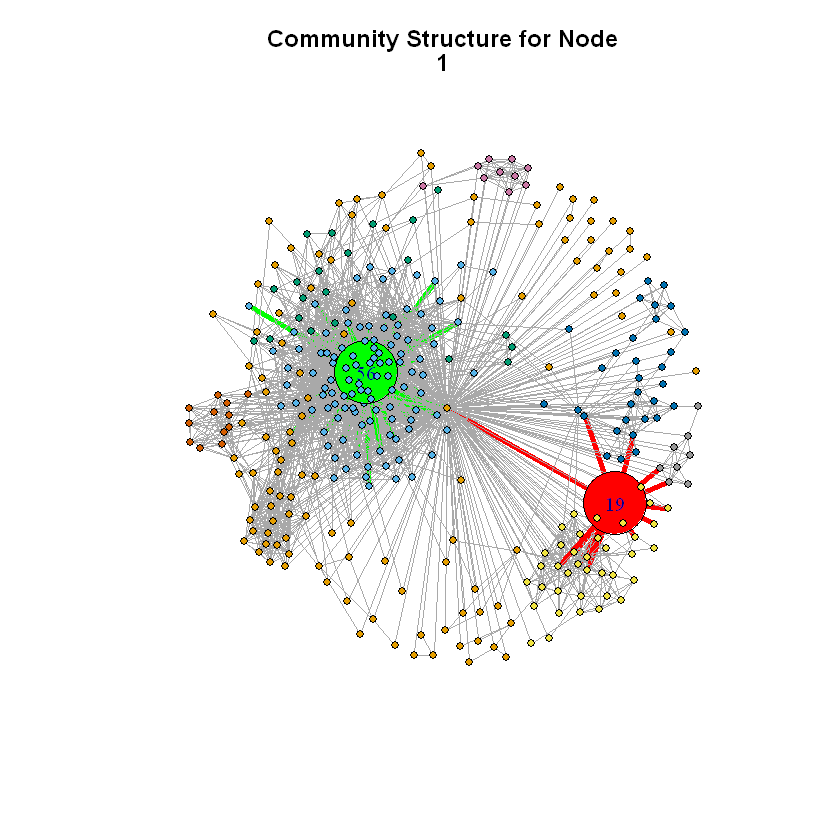

The node with maximum embeddedness of node  348  is  376 
The node with maximum dispersion embeddedness of node  348  is  532 


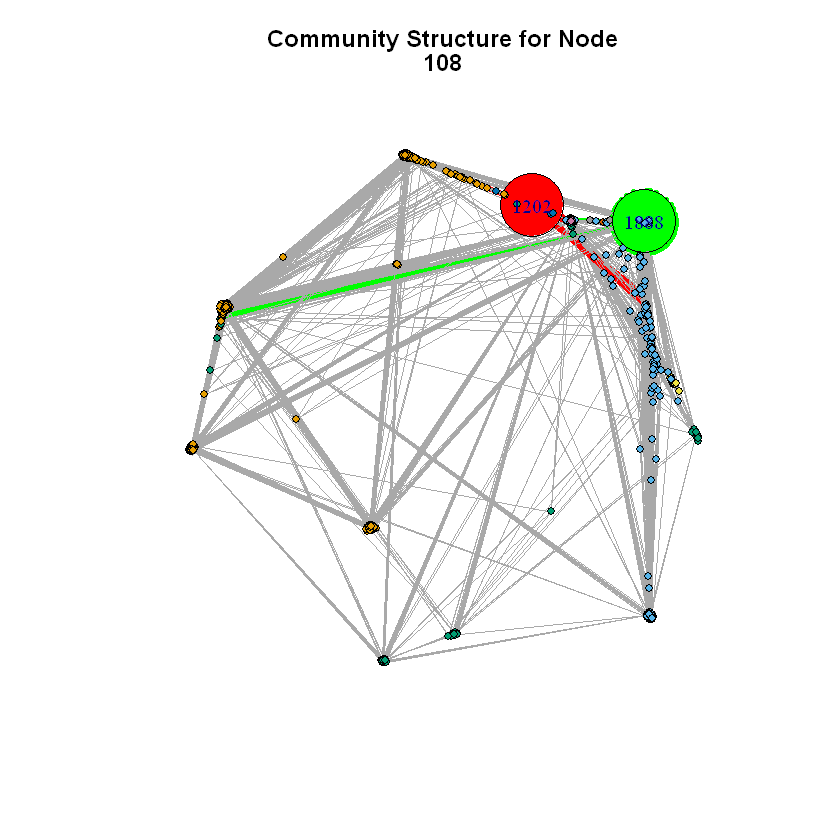

The node with maximum embeddedness of node  483  is  107 
The node with maximum dispersion embeddedness of node  483  is  107 


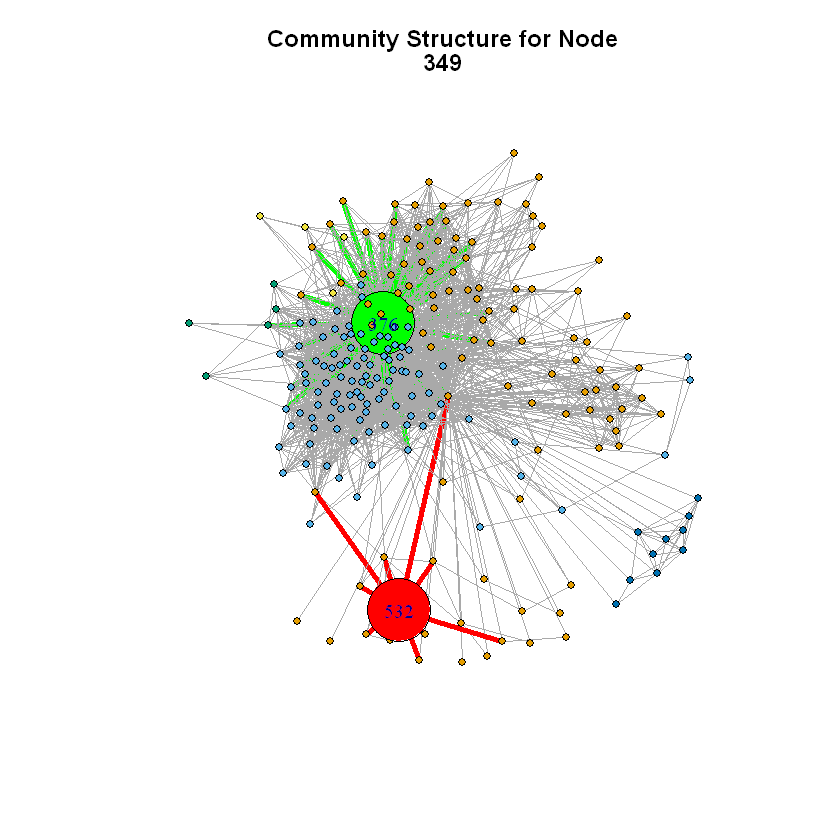

The node with maximum embeddedness of node  1086  is  107 
The node with maximum dispersion embeddedness of node  1086  is  107 


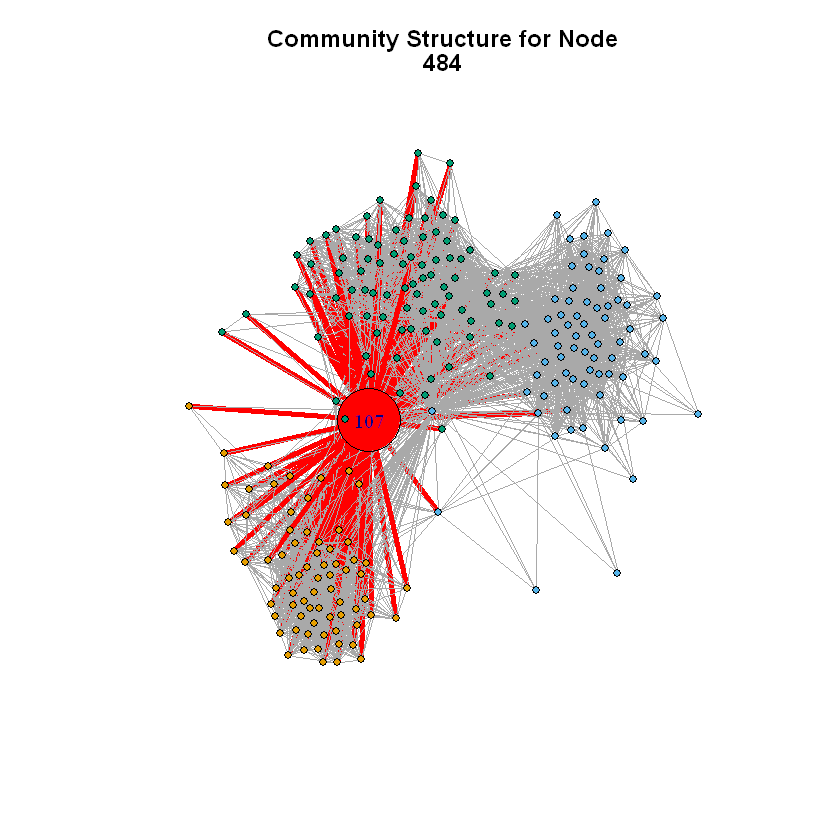

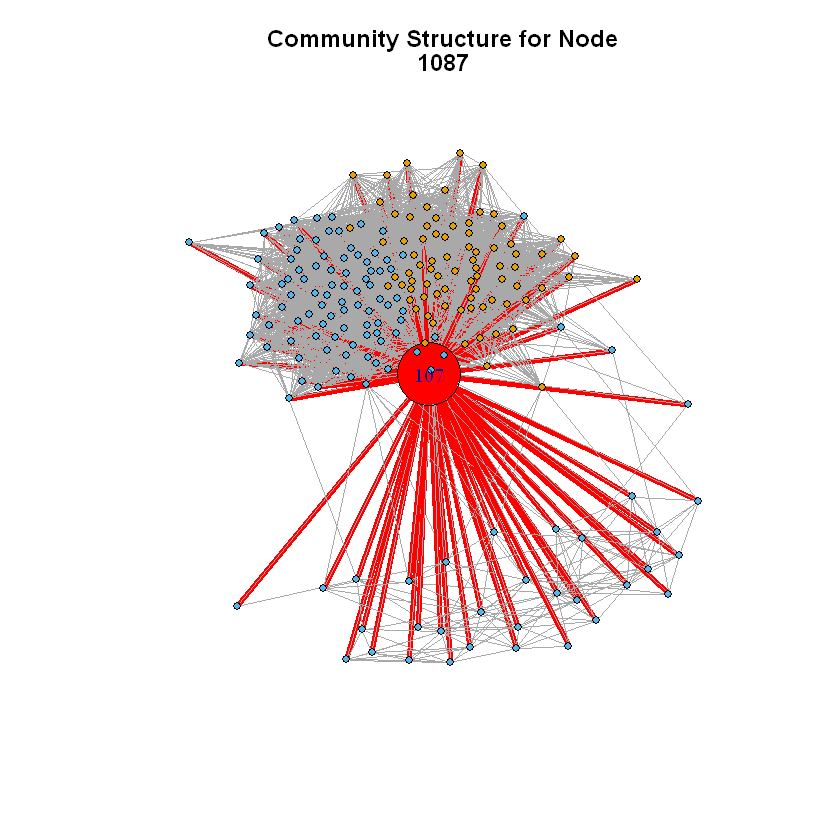

In [11]:
nodes_id=c(0,107,348,483,1086)
nodei_nets=make_ego_graph(fb_net,order=1,nodes=c('0','107','348','483','1086'))
for (i in seq(1:length(nodes_id))){
    #extract corresponding network
    nodei_net=nodei_nets[[i]]
    #extract all neighbor
    nodei_nb=c(V(nodei_net)$name)
    #define empty object
    emb=c()
    disp=c()
    max_de=0
    max_emb=0
    max_node_de=NA
    max_node_e=NA
    for (n in nodei_nb){
        if (n!=nodes_id[i]){
        #extract mutual neighbors of two endpoints
        mutual_neb=intersection(neighbors(nodei_net,toString(nodes_id[i])),neighbors(nodei_net,toString(n)))
        #the number of neighbors is the embeddedness
        emb_sub=length(mutual_neb)
        if (emb_sub==0){
            emb=c(emb,emb_sub)
            disp=c(disp,0)
            next
        }
        #mutual_neb=mutual_neb$name
        mutual_neb_=c()
        for (k in 1:length(mutual_neb)){
            mutual_neb_=c(mutual_neb_,mutual_neb[k]$name)
        }
        net_nouv=delete_vertices(nodei_net,c(nodes_id[i],n))
        dist=distances(net_nouv,v=mutual_neb_, to=mutual_neb_)
        sum=0
        for (j in 1:length(dist)){
            if (dist[j] > 1000){
                sum=sum+1000
            }else{
                sum=sum+dist[j]
            }
        }
        #since each distance is considered twice, divided by 2 
        disp_sub=sum/2
        disp=c(disp,disp_sub)
        emb=c(emb,emb_sub)
        if(emb_sub>max_emb && n!=toString(nodes_id[i])){
            max_emb=emb_sub
            max_node_e=n
        }
        if (emb_sub!=0 && disp_sub/emb_sub > max_de && n!=toString(nodes_id[i])){
            max_de=disp_sub/emb_sub
            max_node_de=n
        }
    }
    }
    #plot community structure
    community=cluster_fast_greedy(nodei_net)
    cat('The node with maximum embeddedness of node ',nodes_id[i],' is ',max_node_e,'\n')
    cat('The node with maximum dispersion embeddedness of node ',nodes_id[i],' is ',max_node_de,'\n')
    edge_color=rep('darkgray',length(E(nodei_net)))
    edge_weight=rep(0.5,length(E(nodei_net)))
    ver_color=rep(community$membership,length(V(nodei_net)))
    ver_size=rep(3,length(V(nodei_net)))
    ver_label=rep(NA,length(V(nodei_net)))
    #specify required nodes and edges
    
    edge_color[which(as_edgelist(nodei_net)[,1]==max_node_e | as_edgelist(nodei_net)[,2]==max_node_e)]='green'
    edge_color[which(as_edgelist(nodei_net)[,1]==max_node_de | as_edgelist(nodei_net)[,2]==max_node_de)]='red'
    edge_weight[which(as_edgelist(nodei_net)[,1]==max_node_e | as_edgelist(nodei_net)[,2]==max_node_e | as_edgelist(nodei_net)[,1]==max_node_de | as_edgelist(nodei_net)[,2]==max_node_de)]=4
    ver_color[which(V(nodei_net)$name==max_node_e)]='green'
    ver_color[which(V(nodei_net)$name==max_node_de)]='red'
    ver_size[which(V(nodei_net)$name==max_node_e | V(nodei_net)$name==max_node_de)]=25
    ver_label[which(V(nodei_net)$name==max_node_e)]=max_node_e
    ver_label[which(V(nodei_net)$name==max_node_de)]=max_node_de
    
    plot(nodei_net,edge.arrow.size=.1,vertex.color=ver_color,vertex.size=ver_size,vertex.label=ver_label,edge.color=edge_color,edge.width=edge_weight,main=c('Community Structure for Node',nodes_id[i]+1))
    
}

,107,483,917,1032
107,0,1,1,1
483,1,0,1,1
917,1,1,0,1
1032,1,1,1,0


In [16]:
emb

[1] 204  20   8  11  16  13  95  13 101  61 110  77  62  69  72  88  64  72
 [19]  42  99  54  95   2  64  38  10  48  32 113   8  35  44  98 123  86  10
 [37]  78  14  85  35  80  38  87 133  70  46 107  45   6  92  59 100  70  78
 [55]  16  76  84  27 107 110   9  61 142  37  56 115  70  81  14  96  72  90
 [73]  76  93  84  76   9  43  70  64  78   7  85  42  10  78  76  90  67  59
 [91]  48 138  13 106  85  46 110 114 133 113 122  50  76   6   7  11   8 142
[109]  10  89  61 100  46   9  73 119  56  61  94  74 110  23  95  53  91  23
[127]  92  62  11  67  36 129 103  80  97  92  60  74 122 122  77  87  74 125
[145] 113  54  70  59  58   7 100 144  91  94   4  70   5   7  50  83 130 126
[163]   7  93  77  30   6 130  75 105  59  71 138  87  48  28  95  75 121  82
[181] 103 151 136  82  70  85  92 122   6  34 136 101  69  11  88  52  75  82
[199]  42 111  76 162  67  84   4

# QUESTION 15: Use the plots from Question 13 and 14 to explain the characteristics of a node revealed by each of this measure.